In [1]:
# Import required modules
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from scipy import stats

In [2]:
# Setting the options to display maximum rows and columns in the output
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# Read data's from Merged_Cities_data.csv file and store it in a variable 
merged_cities = pd.read_csv("Merged_Cities_data.csv", low_memory=False)

In [4]:
# Display information of the dataframe
merged_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Columns: 101 entries, it to city
dtypes: float64(16), int64(4), object(81)
memory usage: 6.4+ MB


In [5]:
# Fetching columns name in the dataframe
for col_name in merged_cities.columns:
    print(col_name)

it
ft
bt
km
transmission
ownerNo
owner
oem
model
modelYear
centralVariantId
variantName
price
priceActual
priceSaving
priceFixedText
trendingText.imgUrl
trendingText.heading
trendingText.desc
heading
Registration Year
Registration Year Icon
Insurance Validity
Insurance Validity Icon
Fuel Type
Fuel Type Icon
Seats
Seats Icon
Kms Driven
Kms Driven Icon
RTO
RTO Icon
Ownership
Ownership Icon
Engine Displacement
Engine Displacement Icon
Transmission
Transmission Icon
Year of Manufacture
Year of Manufacture Icon
bottomData
heading.1
top feature 1
top feature 2
top feature 3
top feature 4
top feature 5
top feature 6
top feature 7
top feature 8
Comfort & Convenience
Interior
Exterior
Safety
commonIcon
top feature 9
Entertainment & Communication
heading.2
Mileage
Engine
Max Power
Torque
Seats.1
Color
Engine Type
Displacement
Max Torque
No of Cylinder
Values per Cylinder
Value Configuration
Fuel Suppy System
BoreX Stroke
Compression Ratio
Turbo Charger
Super Charger
Length
Width
Height
Wheel Bas

In [6]:
# Inital size of the dataframe
print('dataset size intially:', merged_cities.shape)

dataset size intially: (8369, 101)


##### Step-1 Drop the unnecessary columns and repeating columns (some columns are repeated in the dataset so we are keeping only one column and dropping the rest)

In [7]:
# Check if all rows match
def check_rows_match(df, column1, column2):
    if (df[column1] == df[column2]).all():
        print("all data is same")
    else:
        print("datas are different")
        mismatched_rows = df[df[column1] != df[column2]]
        print("Mismatched Rows:")
        print(mismatched_rows[[column1, column2]])

In [8]:
# Check 'ownerNo' and 'owner' having same value in rows
check_rows_match(merged_cities, 'ownerNo', 'owner')

datas are different
Mismatched Rows:
      ownerNo      owner
0           3  3rd Owner
1           2  2nd Owner
2           1  1st Owner
3           1  1st Owner
4           1  1st Owner
5           1  1st Owner
6           1  1st Owner
7           1  1st Owner
8           1  1st Owner
9           1  1st Owner
10          1  1st Owner
11          1  1st Owner
12          1  1st Owner
13          1  1st Owner
14          3  3rd Owner
15          1  1st Owner
16          1  1st Owner
17          2  2nd Owner
18          1  1st Owner
19          2  2nd Owner
20          3  3rd Owner
21          1  1st Owner
22          1  1st Owner
23          2  2nd Owner
24          2  2nd Owner
25          1  1st Owner
26          1  1st Owner
27          2  2nd Owner
28          1  1st Owner
29          2  2nd Owner
30          2  2nd Owner
31          2  2nd Owner
32          1  1st Owner
33          1  1st Owner
34          1  1st Owner
35          2  2nd Owner
36          1  1st Owner
37          2

In [9]:
# Check 'Seats' and 'Seats.1' having same value in rows
check_rows_match(merged_cities, 'Seats', 'Seats.1')

datas are different
Mismatched Rows:
         Seats  Seats.1
0      5 Seats      5.0
1      5 Seats      5.0
2      5 Seats      5.0
3      5 Seats      5.0
4      5 Seats      5.0
5      5 Seats      5.0
6      5 Seats      5.0
7      5 Seats      5.0
8      5 Seats      5.0
9      5 Seats      5.0
10     5 Seats      5.0
11     5 Seats      5.0
12     5 Seats      5.0
13     5 Seats      5.0
14     7 Seats      7.0
15     5 Seats      5.0
16     5 Seats      5.0
17     5 Seats      5.0
18     5 Seats      5.0
19     5 Seats      5.0
20     5 Seats      5.0
21     5 Seats      5.0
22     5 Seats      5.0
23     5 Seats      5.0
24     5 Seats      5.0
25     5 Seats      5.0
26     5 Seats      5.0
27     5 Seats      5.0
28     5 Seats      5.0
29     7 Seats      7.0
30     5 Seats      5.0
31     7 Seats      7.0
32     5 Seats      5.0
33     5 Seats      5.0
34     5 Seats      5.0
35     7 Seats      7.0
36     5 Seats      5.0
37     5 Seats      5.0
38     5 Seats      5.0
39 

In [10]:
# Check 'Seats' and 'Seating Capacity' having same value in rows
check_rows_match(merged_cities, 'Seats', 'Seating Capacity')

datas are different
Mismatched Rows:
         Seats  Seating Capacity
0      5 Seats               5.0
1      5 Seats               5.0
2      5 Seats               5.0
3      5 Seats               5.0
4      5 Seats               5.0
5      5 Seats               5.0
6      5 Seats               5.0
7      5 Seats               5.0
8      5 Seats               5.0
9      5 Seats               5.0
10     5 Seats               5.0
11     5 Seats               5.0
12     5 Seats               5.0
13     5 Seats               5.0
14     7 Seats               7.0
15     5 Seats               5.0
16     5 Seats               5.0
17     5 Seats               5.0
18     5 Seats               5.0
19     5 Seats               5.0
20     5 Seats               5.0
21     5 Seats               5.0
22     5 Seats               5.0
23     5 Seats               5.0
24     5 Seats               5.0
25     5 Seats               5.0
26     5 Seats               5.0
27     5 Seats               5.0
28    

In [11]:
# Check 'Seats.1' and 'Seating Capacity' having same value in rows
check_rows_match(merged_cities, 'Seats.1', 'Seating Capacity')

datas are different
Mismatched Rows:
      Seats.1  Seating Capacity
1175      NaN               NaN
3528      NaN               NaN
6211      NaN               NaN
7608      NaN               NaN
7669      NaN               NaN
7745      NaN               NaN


In [12]:
# Check 'ft' and 'Fuel Type' having same value in rows
check_rows_match(merged_cities, 'ft', 'Fuel Type')

datas are different
Mismatched Rows:
       ft Fuel Type
27    Lpg       LPG
90    Lpg       LPG
254   Cng       CNG
788   Cng       CNG
794   Cng       CNG
795   Cng       CNG
1016  Cng       CNG
1392  Cng       CNG
1663  Cng       CNG
2477  Cng       CNG
2742  Cng       CNG
2906  Cng       CNG
2908  Cng       CNG
2967  Cng       CNG
2968  Cng       CNG
2983  Cng       CNG
3019  Cng       CNG
3073  Cng       CNG
3105  Cng       CNG
3106  Cng       CNG
3200  Cng       CNG
3230  Cng       CNG
3233  Cng       CNG
3261  Cng       CNG
3264  Cng       CNG
3273  Cng       CNG
3276  Cng       CNG
3280  Cng       CNG
3298  Cng       CNG
3337  Cng       CNG
3414  Cng       CNG
3465  Cng       CNG
3494  Cng       CNG
3506  Cng       CNG
3520  Cng       CNG
3549  Cng       CNG
3582  Cng       CNG
3598  Cng       CNG
3634  Cng       CNG
3648  Cng       CNG
3732  Lpg       LPG
3739  Cng       CNG
3753  Cng       CNG
3776  Cng       CNG
3799  Cng       CNG
3800  Cng       CNG
3807  Cng       CNG
383

In [13]:
# Check 'transmission' and 'Transmission' having same value in rows
check_rows_match(merged_cities, 'transmission', 'Transmission')

all data is same


In [14]:
# Check 'modelYear' and 'Year of Manufacture' having same value in rows
check_rows_match(merged_cities, 'modelYear', 'Year of Manufacture')

datas are different
Mismatched Rows:
      modelYear  Year of Manufacture
487        1995                  NaN
490        1995                  NaN
584        1998                  NaN
690        1998                  NaN
777        2001                  NaN
914        2001                  NaN
1055       2000                  NaN
4554       2001                  NaN
4739       2001                  NaN
5199       1985                  NaN
5544       1997                  NaN
5780       2001                  NaN
5804       2001                  NaN
6287       2001                  NaN
6508       1999                  NaN
6626       1999                  NaN
6724       1998                  NaN
6836       2001                  NaN
6889       2001                  NaN
7063       1985                  NaN


In [15]:
# Function to modify the 'Kms Driven' column
def modify_kmsdriven_column(df):
    try:
        df['Kms Driven'] = df['Kms Driven'].str.replace('Kms','').str.strip()
        df['Kms Driven'] = df['Kms Driven'].str.strip()
        print("Successfully modified the 'Kms Driven' column")
       
    except Exception as e:
        print("Error occured when modifying the 'Kms Driven' column",e)
        
modify_kmsdriven_column(merged_cities)

# Check 'Kms Driven' and 'km' having same value in rows
check_rows_match(merged_cities, 'Kms Driven', 'km')   

Successfully modified the 'Kms Driven' column
datas are different
Mismatched Rows:
     Kms Driven km
5683        NaN  0
6430        NaN  0


In [16]:
# Function to modify column contains 'cc' in the values
def remove_cc(df, column_name):
    try:
        df[column_name] = df[column_name].str.replace('cc', '', case=False).str.strip()
        print(f"successfully removed 'cc' from the column {column_name}")
  
    except Exception as e:
        print(f"Error occured  when removing 'cc' from column {column_name}",e)
        
remove_cc(merged_cities, 'Engine Displacement')  # removing 'cc' from 'Engine Displacement' column
remove_cc(merged_cities, 'Engine')

# Check 'Engine Displacement' and 'Engine' having same value in rows
check_rows_match(merged_cities, 'Engine Displacement', 'Engine')
# Check 'Engine Displacement' and 'Displacement' having same value in rows
check_rows_match(merged_cities, 'Engine Displacement', 'Displacement')

successfully removed 'cc' from the column Engine Displacement
successfully removed 'cc' from the column Engine
datas are different
Mismatched Rows:
     Engine Displacement Engine
487                  NaN    NaN
490                  NaN    NaN
574                  NaN    NaN
5510                 NaN    NaN
datas are different
Mismatched Rows:
     Engine Displacement  Displacement
0                    998         998.0
1                   1497        1497.0
2                   1199        1199.0
3                   1197        1197.0
4                   1248        1248.0
5                   1956        1956.0
6                   1198        1198.0
7                    998         998.0
8                   1462        1462.0
9                   1199        1199.0
10                  1197        1197.0
11                  1197        1197.0
12                  1199        1199.0
13                  1199        1199.0
14                  2179        2179.0
15                  1956       

In [17]:
# Function to remove '@rpm' from the column values
def remove_nm_rpm(df, column_name):
    try:
        df[column_name] = df[column_name].str.split('@').str[0]
        print(f"Successfully removed '@rpm' from the column {column_name}")
    
    except Exception as e:
        print(f"Error occurred when removing '@rpm' from column {column_name}: ", e)


remove_nm_rpm(merged_cities, 'Max Torque')

# Check 'Max Torque' and 'Torque' having same value in rows
check_rows_match(merged_cities, 'Max Torque', 'Torque')

Successfully removed '@rpm' from the column Max Torque
datas are different
Mismatched Rows:
     Max Torque Torque
487         NaN    NaN
490         NaN    NaN
600         NaN    NaN
637         NaN    NaN
690         NaN    NaN
747         NaN    NaN
902         NaN    NaN
976         NaN    NaN
984         NaN    NaN
1014        NaN    NaN
1016        NaN    NaN
1055        NaN    NaN
1065        NaN    NaN
1175        NaN    NaN
1195        NaN    NaN
1276        NaN    NaN
1759        NaN    NaN
1991        NaN    NaN
2006        NaN    NaN
2195        NaN    NaN
2340        NaN    NaN
2462        NaN    NaN
2494        NaN    NaN
2536        NaN    NaN
2616        NaN    NaN
2617        NaN    NaN
2651        NaN    NaN
3284        NaN    NaN
3753        NaN    NaN
4225        NaN    NaN
4554        NaN    NaN
4594        NaN    NaN
5138        NaN    NaN
5162        NaN    NaN
5450        NaN    NaN
5473        NaN    NaN
5510        NaN    NaN
5544        NaN    NaN
5567       

In [18]:
# Function to drop column
def drop_column(df,column_name):
    try:
        df.drop(columns=column_name, inplace=True) 
        print(f"Successfully dropped the '{column_name}' column")

    except Exception as e:
        print(f"Error occured when dropping the '{column_name}' column",e)

In [19]:
# Function to drop columns contains . in their name
def drop_dot_column(df):
    try:
        drop_columns = df.filter(like='.', axis=1).columns
        df.drop(columns= drop_columns, inplace= True)
        print(f"Successfully dropped the columns {drop_columns} contains '.' in their name")

    except Exception as e:
        print("Error occured when droping column contains '.' in their name:",e)

In [20]:
# Function to drop columns contains icon in their name
def drop_icon_column(df):
    try:
        drop_columns = df.filter(like='Icon', axis=1).columns
        df.drop(columns= drop_columns, inplace= True)
        print(f"Successfully dropped the columns {drop_columns} contains 'icon' in their name")

    except Exception as e:
        print("Error occured when droping column contains 'icon' in their name:",e)

In [21]:
# both 'ownerNo' and 'owner' and 'Ownership' columns are same, so we can drop one of them
drop_column(merged_cities, ['owner', 'Ownership'])

# both 'Seats' and 'Seats.1' and 'Seating Capacity' columns are same, so we can drop one of them
drop_column(merged_cities, ['Seats.1', 'Seating Capacity'])

# both 'ft' and 'Fuel Type' columns are same, so we can drop one of them
drop_column(merged_cities, ['ft'])

# both 'transmission' and 'Transmission' columns are same, so we can drop one of them
drop_column(merged_cities, ['Transmission'])

# both 'modelYear' and 'Year of Manufacture' columns are same, so we can drop one of them
drop_column(merged_cities, ['Year of Manufacture'])

# both 'Kms Driven' and 'km' columns are same, so we can drop one of them
drop_column(merged_cities, ['Kms Driven'])

# both 'Engine Displacement' and 'Engine' and 'Displacement' columns are same, so we can drop one of them
drop_column(merged_cities, ['Engine','Displacement'])

# drop columns contains '.' in their name
drop_dot_column(merged_cities)

# drop columns contains 'icon' in their name
drop_icon_column(merged_cities)

# drop 'car_links' column
drop_column(merged_cities, ['car_links'])

# drop 'heading' column because it contains same values
drop_column(merged_cities, ['heading'])

# both 'Max Torque' and 'Torque' columns are same, so we can drop one of them
drop_column(merged_cities, ['Max Torque'])



Successfully dropped the '['owner', 'Ownership']' column
Successfully dropped the '['Seats.1', 'Seating Capacity']' column
Successfully dropped the '['ft']' column
Successfully dropped the '['Transmission']' column
Successfully dropped the '['Year of Manufacture']' column
Successfully dropped the '['Kms Driven']' column
Successfully dropped the '['Engine', 'Displacement']' column
Successfully dropped the columns Index(['trendingText.imgUrl', 'trendingText.heading', 'trendingText.desc',
       'heading.1', 'heading.2', 'commonIcon.1'],
      dtype='object') contains '.' in their name
Successfully dropped the columns Index(['Registration Year Icon', 'Insurance Validity Icon', 'Fuel Type Icon',
       'Seats Icon', 'Kms Driven Icon', 'RTO Icon', 'Ownership Icon',
       'Engine Displacement Icon', 'Transmission Icon',
       'Year of Manufacture Icon', 'commonIcon'],
      dtype='object') contains 'icon' in their name
Successfully dropped the '['car_links']' column
Successfully dropped th

In [22]:
# Size of the Dataframe and dropping the unnecessary columns
print('dataset size after dropped unnecessary and duplicate columns:', merged_cities.shape)

dataset size after dropped unnecessary and duplicate columns: (8369, 71)


In [ ]:
""" conclusion from step 1 - ['owner', 'Ownership', 'Seats.1', 'Seating Capacity', 'ft', 'Transmission', 'Year of Manufacture', 'Kms Driven', 'Engine', 'Displacement', 
 'trendingText.imgUrl', 'trendingText.heading', 'trendingText.desc', 'heading.1', 'heading.2', 'commonIcon.1', 'Registration Year Icon', 'Insurance Validity Icon', 'Fuel Type Icon',
 'Seats Icon', 'Kms Driven Icon', 'RTO Icon', 'Ownership Icon','Engine Displacement Icon', 'Transmission Icon','Year of Manufacture Icon', 'commonIcon', 'car_links', 
 'heading', 'Max Torque']   --- These columns are either having unnecessary data or having repeated columns """

##### Step 2 - Formatting the columns to display values in the correct meaningful format

In [23]:
# Function to extract years from columns
def extract_years(df, registration_year_col):
    df[registration_year_col] = (df[registration_year_col].astype(str).str.extract(r'(\d{4})')[0].fillna(merged_cities['modelYear']).astype(int))
    print(f"successfully extracted the year from the '{registration_year_col}' column")

In [24]:
# Function to modify price column
def modify_price_column(df, column_name):
    try:
        df[column_name] = df[column_name].str.replace('₹', '').str.strip()
        df[column_name] = df[column_name].str.replace(r'(\d+(\.\d+)?) Lakh', lambda x: f"{float(x.group(1)) * 100000:.2f}", regex=True)
        df[column_name] = df[column_name].str.replace(r'(\d+(\.\d+)?) Crore', lambda x: f"{float(x.group(1)) * 10000000:.2f}", regex=True)
        df[column_name] = df[column_name].str.replace(',', '').str.strip()
        df[column_name] = df[column_name].str.strip()
        print(f"Successfully modified the '{column_name}' column")

    except Exception as e:
        print(f"Error occured when modifying the '{column_name}' column",e)

In [25]:
# Function to modify values which contains ',' in it
def remove_comma(df, column_name):
    try:
        df[column_name] = df[column_name].str.replace(',', '', case=False).str.strip()
        print(f"successfully removed ',' from the column '{column_name}'")
  
    except Exception as e:
        print(f"Error occured  when removing ',' from column '{column_name}'",e)

In [26]:
# Function to modify values which contains 'b' and '@' in it
def remove_bhp_rpm(df, column_name):
    try:
        df[column_name] = df[column_name].str.split('b').str[0]
        df[column_name] = df[column_name].str.split('@').str[0]
        print(f"Successfully removed 'bhp@rpm' from the column '{column_name}'")
    
    except Exception as e:
        print(f"Error occurred when removing 'bhp@rpm' from column '{column_name}':",e)

In [27]:
# Funtion to modify 'height' column
def modify_height_column(df, column_name):
    try:
        def process_val(value):
            if isinstance(value, str):
                if '-' in value:
                    range_values = value.split('-')
                    avg_value = sum(int(i) for i in range_values) / len(range_values)
                    return str(avg_value)
                
                elif 'mm' in value:
                    return value.replace('mm', '').strip()
                
                else:
                    return value
                  
        df[column_name] = df[column_name].apply(process_val)
        df[column_name] = df[column_name].str.replace(',', '').str.strip()
        print(f"Successfully modified the '{column_name}' column")

    except Exception as e:
        print(f"Error occured when modifying the '{column_name}' column",e)

In [28]:
# Funtion to modify column which contains 'kgs, kg' in it
def modify_kg_kgs_column(df, column_name): 
    try:
        def process_val(value):
            if isinstance(value, str):

                if '-' in value:
                    range_values = value.split('-')
                    cleaned_value = [float(val.replace('kgs', '').replace('Kgs', '').replace(',', '').replace('Kg', '').replace('kg', '').strip()) for val in range_values]
                    avg_value = sum(cleaned_value) / len(range_values)
                    return avg_value
                
                elif 'kg' in value or 'kgs' in value or 'Kg' in value or 'Kgs' in value:
                    return float(value.replace('kgs', '').replace('Kgs', '').replace('Kg', '').replace('kg', '').replace(',', '').replace('.', '').strip())
                
                elif 'Kerb Weight' in value:
                    return 0.0
                
                else:
                    return float(value.replace(',', '').strip())
                  
        df[column_name] = df[column_name].apply(process_val)
        print(f"Successfully modified the '{column_name}' column")

    except Exception as e:
        print(f"Error occured when modifying the '{column_name}' column",e)

In [29]:
# Function to modify the 'Gear Box' column
def convert_gear_speed_to_number(df, column_name):
    try:
        word_to_number = {'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5,'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10}
        
        def extract_number(value):
            if pd.isna(value):  
                return np.nan
            value = str(value).lower()
            
            match = re.search(r'\d+', value)
            if match:
                return int(match.group())
            
            for word, number in word_to_number.items():
                if word in value:
                    return number
            
            if 'cvt' in value or 'direct drive' in value:
                return 0  
            if 'single' in value:
                return 1 
            
            return np.nan 

        df[column_name] = df[column_name].apply(extract_number)
        print(f"Successfully modified the '{column_name}' column")
        
    except Exception as e:
        print(f"Error occured when modifying the '{column_name}' column",e)



In [30]:
#  Funtion to extracts numeric values from a column and removes extra spaces
def fetch_numbers_from_column(df, column_name):
    try:
        df[column_name] = df[column_name].astype(str).str.extract(r'(\d+(\.\d+)?)')[0].str.strip()
        df[column_name] = df[column_name].str.strip()
        print(f"Successfully modified the '{column_name}' column")
     
    except Exception as e:
        print(f"Error occured when modifying the '{column_name}' column",e)


In [31]:
# Create a new column called 'Features Count' and Drop 'top feature 1', 'top feature 2', 'top feature 3', 'top feature 4','top feature 5', 'top feature 6', 'top feature 7', 'top feature 8','top feature 9' columns 
feature_columns = [
    'top feature 1', 'top feature 2', 'top feature 3', 'top feature 4',
    'top feature 5', 'top feature 6', 'top feature 7', 'top feature 8',
    'top feature 9'
]
merged_cities['Features Count'] = merged_cities[feature_columns].apply(lambda row: row.notna().sum() - row.eq(' ').sum(), axis=1)
for columns in feature_columns:
    drop_column(merged_cities, columns)

Successfully dropped the 'top feature 1' column
Successfully dropped the 'top feature 2' column
Successfully dropped the 'top feature 3' column
Successfully dropped the 'top feature 4' column
Successfully dropped the 'top feature 5' column
Successfully dropped the 'top feature 6' column
Successfully dropped the 'top feature 7' column
Successfully dropped the 'top feature 8' column
Successfully dropped the 'top feature 9' column


In [32]:
# Function to modify value contains 'r' in it
def remove_r(df, column_name):
    try:
        df[column_name] = df[column_name].str.replace('R', '', case=False).str.strip()
        print(f"successfully removed 'R' from the column '{column_name}'")
  
    except Exception as e:
        print(f"Error occured  when removing 'R' from column '{column_name}'",e)
# merged_cities['Mileage'] = merged_cities['Mileage'].replace(r'R(\d+)', r'\1', regex=True)


In [33]:
# extract year from 'Registration Year' column
extract_years(merged_cities, 'Registration Year')

# modify price column
modify_price_column(merged_cities, 'price')

# modify 'km' column
remove_comma(merged_cities, 'km')

# modify 'Max Power' column
remove_bhp_rpm(merged_cities, 'Max Power')  

# modify 'Height' column
modify_height_column(merged_cities, 'Height')

# modify 'Kerb Weight' column
modify_kg_kgs_column(merged_cities, 'Kerb Weight')

# modify 'Gear Box' column
convert_gear_speed_to_number(merged_cities, 'Gear Box')

# modify 'Turning Radius', 'Top Speed', 'Acceleration' , 'Cargo Volumn', 'Length', 'Width', 'Wheel Base', 'Front Tread', 'Rear Tread', 'Torque', 'Mileage', 'Seats' columns (fetching numerical values alone in these columns)
columns = ['Turning Radius', 'Top Speed', 'Acceleration' , 'Cargo Volumn', 'Length', 'Width', 'Wheel Base', 'Front Tread', 'Rear Tread', 'Torque', 'Mileage', 'Seats', 'Max Power']
for col in columns:
    fetch_numbers_from_column(merged_cities, col)

# modify 'Wheel Size', 'Alloy Wheel Size' columns
columns_r = ['Wheel Size', 'Alloy Wheel Size']
for col_r in columns_r:
    remove_r(merged_cities, col_r)


successfully extracted the year from the 'Registration Year' column
Successfully modified the 'price' column
successfully removed ',' from the column 'km'
Successfully removed 'bhp@rpm' from the column 'Max Power'
Successfully modified the 'Height' column
Successfully modified the 'Kerb Weight' column
Successfully modified the 'Gear Box' column
Successfully modified the 'Turning Radius' column
Successfully modified the 'Top Speed' column
Successfully modified the 'Acceleration' column
Successfully modified the 'Cargo Volumn' column
Successfully modified the 'Length' column
Successfully modified the 'Width' column
Successfully modified the 'Wheel Base' column
Successfully modified the 'Front Tread' column
Successfully modified the 'Rear Tread' column
Successfully modified the 'Torque' column
Successfully modified the 'Mileage' column
Successfully modified the 'Seats' column
Successfully modified the 'Max Power' column
successfully removed 'R' from the column 'Wheel Size'
successfully re

In [34]:
# size of the dataframe after formatted the columns
print('dataset size after formatted the data in a meaninful format:', merged_cities.shape)

dataset size after formatted the data in a meaninful format: (8369, 63)


In [ ]:
""" conclusion from Step-2  -- ['Registration Year', 'price', 'km', 'Max Power', 'Height', 'Kerb Weight', 'Gear Box', 'Turning Radius', 'Top Speed', 'Acceleration', 'Cargo Volumn', 'Length', 
'Width', 'Wheel Base', 'Front Tread', 'Rear Tread', 'Torque', 'Mileage', 'Seats', 'Max Power', 'Wheel Size', 'Alloy Wheel Size']  , these columns format are meaningful , 
so converted these column into a meaningful format """

##### Step-3 --> Handle datatype

In [35]:
merged_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8369 entries, 0 to 8368
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   it                             8369 non-null   int64  
 1   bt                             8365 non-null   object 
 2   km                             8369 non-null   object 
 3   transmission                   8369 non-null   object 
 4   ownerNo                        8369 non-null   int64  
 5   oem                            8369 non-null   object 
 6   model                          8369 non-null   object 
 7   modelYear                      8369 non-null   int64  
 8   centralVariantId               8369 non-null   int64  
 9   variantName                    8369 non-null   object 
 10  price                          8369 non-null   object 
 11  priceActual                    1670 non-null   object 
 12  priceSaving                    0 non-null      f

In [36]:
# Function to convert the datatype to float
def change_dtype_float(df,column_name):
    try:
        df[column_name]=df[column_name].astype(float)
        print(f"the datatype of the '{column_name}' column is changed to float successfully")
    except Exception as e:
        print("Error occured when changing the datatype to float of column",column_name,":",e)

In [37]:
# change the datatype of 'km' column to float
change_dtype_float(merged_cities, 'km')

# change the datatype of 'price' column to float
change_dtype_float(merged_cities, 'price')

# change the datatype of 'Seats' column to float
change_dtype_float(merged_cities, 'Seats')

# change the datatype of 'Engine Displacement' column to float
change_dtype_float(merged_cities, 'Engine Displacement')

# change the datatype of 'Mileage' column to float
change_dtype_float(merged_cities, 'Mileage')

# change the datatype of 'Max Power' column to float
change_dtype_float(merged_cities, 'Max Power')

# change the datatype of 'Torque' column to float
change_dtype_float(merged_cities, 'Torque')

# change the datatype of 'Length' column to float
change_dtype_float(merged_cities, 'Length')

# change the datatype of 'Width' column to float
change_dtype_float(merged_cities, 'Width')

# change the datatype of 'Height' column to float
change_dtype_float(merged_cities, 'Height')

# change the datatype of 'Wheel Base' column to float
change_dtype_float(merged_cities, 'Wheel Base')

# change the datatype of 'Front Tread' column to float
change_dtype_float(merged_cities, 'Front Tread')

# change the datatype of 'Front Tread' column to float
change_dtype_float(merged_cities, 'Rear Tread')

# change the datatype of 'Front Tread' column to float
change_dtype_float(merged_cities, 'Turning Radius')

# change the datatype of 'Front Tread' column to float
change_dtype_float(merged_cities, 'Top Speed')

# change the datatype of 'Front Tread' column to float
change_dtype_float(merged_cities, 'Acceleration')

# change the datatype of 'Front Tread' column to float
change_dtype_float(merged_cities, 'Cargo Volumn')

# change the datatype of 'Front Tread' column to float
change_dtype_float(merged_cities, 'Wheel Size')

# change the datatype of 'Front Tread' column to float
change_dtype_float(merged_cities, 'Alloy Wheel Size')


the datatype of the 'km' column is changed to float successfully
the datatype of the 'price' column is changed to float successfully
the datatype of the 'Seats' column is changed to float successfully
the datatype of the 'Engine Displacement' column is changed to float successfully
the datatype of the 'Mileage' column is changed to float successfully
the datatype of the 'Max Power' column is changed to float successfully
the datatype of the 'Torque' column is changed to float successfully
the datatype of the 'Length' column is changed to float successfully
the datatype of the 'Width' column is changed to float successfully
the datatype of the 'Height' column is changed to float successfully
the datatype of the 'Wheel Base' column is changed to float successfully
the datatype of the 'Front Tread' column is changed to float successfully
the datatype of the 'Rear Tread' column is changed to float successfully
the datatype of the 'Turning Radius' column is changed to float successfully
the

In [38]:
# size of the dataframe after handled the datatype
print('dataset size after handled the datatype:', merged_cities.shape)

dataset size after handled the datatype: (8369, 63)


In [ ]:
""" step 3 conclusion - ['km','price', 'Seats', 'Engine Displacement', 'Mileage', 'Max Power', 'Torque', 'Length', 'Width', 'Height', 'Wheel Base', 'Front Tread', 'Rear Tread', 
'Turning Radius', 'Top Speed', 'Acceleration', 'Cargo Volumn', 'Wheel Size', 'Alloy Wheel Size'] --> these column have mismatched datatypes , so modified the object datatype columns 
to float datatype columns """

##### Step-4 --> Handle Null values

In [39]:
# size of the dataframe before dropping 50% of missing values 
print(f"size of dataframe before dropping 50 percent missing value : ({merged_cities.shape})")

size of dataframe before dropping 50 percent missing value : ((8369, 63))


In [40]:
# Function to drop columns and rows with 50% of missing values
def drop_missing_values_row_column(df, drop_percent=0.5, drop_columns=True, drop_rows=True):
    try:
        if drop_columns:
            missing_percentage_cols = df.isnull().mean()
            columns_to_drop = missing_percentage_cols[missing_percentage_cols >= drop_percent].index.tolist()
            df.drop(columns=columns_to_drop, inplace=True)
            print(f"Successfully dropped columns: {columns_to_drop} with {drop_percent*100}% or more missing values.")

        if drop_rows:
            missing_percentage_rows = df.isnull().mean(axis=1)
            rows_to_drop = missing_percentage_rows[missing_percentage_rows >= drop_percent].index
            df.drop(index=rows_to_drop, inplace=True)
            print(f"Successfully dropped {len(rows_to_drop)} rows with {drop_percent*100}% or more missing values.")

    except Exception as e:
        print("Error occurred while dropping missing values:", e)

# drop columns with 50% of missing values
drop_missing_values_row_column(merged_cities)

Successfully dropped columns: ['priceActual', 'priceSaving', 'priceFixedText', 'bottomData', 'BoreX Stroke', 'Compression Ratio', 'Gross Weight', 'Ground Clearance Unladen'] with 50.0% or more missing values.
Successfully dropped 31 rows with 50.0% or more missing values.


In [41]:
# size of the dataframe after dropping 50% of missing values 
print(f"size of dataframe after dropping 50 percent missing value : ({merged_cities.shape})")

size of dataframe after dropping 50 percent missing value : ((8338, 55))


In [42]:
null_counts = merged_cities.isna().sum()
null_counts = null_counts[null_counts > 0]
print(null_counts)

bt                                  4
Insurance Validity                  4
Seats                               1
RTO                               882
Engine Displacement                 1
Comfort & Convenience              37
Interior                           46
Exterior                           59
Safety                             65
Entertainment & Communication    1064
Mileage                           266
Max Power                          30
Torque                             30
Engine Type                       265
No of Cylinder                     27
Values per Cylinder                46
Value Configuration              2187
Fuel Suppy System                1696
Turbo Charger                    1010
Super Charger                    1932
Length                             49
Width                              53
Height                             49
Wheel Base                        132
Front Tread                      3527
Rear Tread                       3539
Kerb Weight 

In [43]:
# Function to drop null values in a columns 
def drop_null_values(df,column_name):
    try:
        df.dropna(subset=[column_name], inplace=True)
        print(f"Successfully dropped null values from the '{column_name}' column")

    except Exception as e:
        print(f"Error occured when dropping null values from the '{column_name}' column",e)

In [44]:
# Function to handle null values in a RTO column
def handle_null_values_in_rto(df):
    try:
        mode_RTO_city_dict = (merged_cities.groupby('city')['RTO'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None).to_dict())
        df['RTO'] = merged_cities.apply(lambda x: mode_RTO_city_dict[x['city']] if pd.isnull(x['RTO']) else x['RTO'], axis=1)

        print(f"Successfully handled null values in the '{'RTO'}' column")
    except Exception as e:
        print(f"Error occurred when handling null values in the '{'RTO'}' column: {e}")

In [45]:
# Function to handle null values in a column by mean value of the respective columm
def handle_null_by_mean(df, column_name):
    try:
        df[column_name] = df[column_name].fillna(df[column_name].mean())
        print(f"Successfully handled null values in the '{column_name}' column by mean")
    except Exception as e:
        print(f"Error occurred when handling null values in the '{column_name}' column by mean: ", e)

In [46]:
# Function to handle null values in a 'Mileage' column
def handle_null_in_Mileage_column(df):
    try:
        avg_mileage = df.groupby(['model', 'modelYear', 'Fuel Type'])['Mileage'].transform(lambda x: x.fillna(x.mean()))
        df['Mileage'] = df['Mileage'].fillna(avg_mileage)
        null_count = df['Mileage'].isnull().sum()
        print(f"Total null values in 'Mileage' after update: {null_count}")

        # if null vales are still present in Mileage column, then fill it with mean value of the column
        if null_count != 0:
            df['Mileage'] = df['Mileage'].fillna(df['Mileage'].mean())
        null_count = df['Mileage'].isnull().sum()

        print(f"Total null values in 'Mileage' after update again: {null_count}")

    except Exception as e:
        print("Error occurred when handling null values in 'Mileage' column: ", e)

In [47]:
# Function to handle null values in a 'Max Power' and 'Torque' column
def handle_null_in_power_torque(df, column_name):
    try:
        avg_val = df.groupby(['model', 'oem'])[column_name].transform(lambda x: x.fillna(x.mean()))
        df[column_name] = df[column_name].fillna(avg_val)
        null_count = df[column_name].isnull().sum()
        print(f"Total null values in '{column_name}' after update: {null_count}")

        # if null vales are still present in column, then fill it with mean value of the column
        if null_count != 0:
            df[column_name] = df[column_name].fillna(df[column_name].mean())
            
        null_count = df[column_name].isnull().sum()
        print(f"Total null values in '{column_name}' after update again: {null_count}")

    except Exception as e:
        print(f"Error occurred when handling null values in '{column_name}' column: ", e)

In [48]:
# Function to handle null values in a 'Engine Type' column
def handle_null_in_engine_type(df):
    try:
        def fill_with_mode(series):
            mode_value = series.mode()
            if not mode_value.empty:
                return series.fillna(mode_value[0])
            else:
                return series.fillna('Unknown')

        df['Engine Type'] = df.groupby(['model', 'modelYear', 'oem'])['Engine Type'].transform(fill_with_mode)

        null_count = df['Engine Type'].isnull().sum()
        print(f"Total null values in 'Engine Type' column after group-specific mode update: {null_count}")

        if null_count != 0:
            global_mode = df['Engine Type'].mode()
            if not global_mode.empty:
                df['Engine Type'] = df['Engine Type'].fillna(global_mode[0])

        null_count = df['Engine Type'].isnull().sum()
        print(f"Total null values in 'Engine Type' column after global mode update: {null_count}")

    except Exception as e:
        print("Error occurred when handling null values in 'Engine Type' column: ", e)

In [49]:
# Function will fill the empty values in No of cylinders column
def fill_cylinders(row):
    try:
        if pd.isnull(row['No of Cylinder']):
            if row['Engine Displacement'] <=2000:
                return 4
            elif row['Engine Displacement'] <=4000:
                return 6
            else:
                return 8
        pass
    except Exception as e:
        print("Error occurred when filling the null ")

# Function to handle null values in a 'No of Cylinder' column
def handle_cylinder_null_values(df,column_name):
    try:
        avg_engine_val = df.groupby(['model', 'oem'])[column_name].transform(lambda x: x.fillna(x.mean()))
        df[column_name] = df[column_name].fillna(avg_engine_val)
        null_count = df[column_name].isnull().sum()
        print(f"Total null values in '{column_name}' after update: {null_count}")

        if null_count != 0:
            df['No of Cylinder'] = df.apply(lambda row: fill_cylinders(row) if pd.isnull(row['No of Cylinder']) else row['No of Cylinder'], axis=1)

        null_count = df[column_name].isnull().sum()
        print(f"Total null values in '{column_name}' after update again: {null_count}")

    except Exception as e:
        print("Error occurred when handling null values in 'No of Cylinder' column: ", e)


In [50]:
# Function to handle null values in a 'Values per Cylinder' column
def handle_null_in_cylinder(df):
    try:
        mean_value_per_cylinder = df['Values per Cylinder'].mean()
        df['Values per Cylinder'] = df['Values per Cylinder'].fillna(mean_value_per_cylinder)
        df = df[merged_cities['Values per Cylinder'] <= 10]
        print(f"{len(merged_cities[merged_cities['Values per Cylinder'] > 10])} rows were deleted because 'Values per Cylinder' was greater than 10.")
        
        null_count = df['Values per Cylinder'].isnull().sum()
        print(f"Total null values in 'Values per Cylinder' after update :",null_count)

    except Exception as e:
        print("Error occurred when handling null values in 'No of Cylinder' column: ", e)

In [51]:
# Function to handle null values in a column
def handle_val_config(df, column_name1, column_name2):
    try:
        Value_mode = df.groupby(column_name1)[column_name2].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
        Value_mean = df[column_name2].mode()[0]

        Value_model_dict = Value_mode.to_dict()
        df[column_name2] = df.apply(lambda row: Value_model_dict.get(row[column_name1]) if pd.isnull(row[column_name2]) and Value_model_dict.get(row[column_name1]) is not None else (Value_mean if pd.isnull(row[column_name2]) else row[column_name2]), axis=1)
        
        missing_Value_Configuration= df[df[column_name2].isnull()][column_name1]
        print(f"Number of missing value after filling in '{column_name2}':", missing_Value_Configuration.shape[0])

        if missing_Value_Configuration.shape[0] != 0:
            df[column_name2] = df[column_name2].fillna(Value_mean)
            after_modify = df[df[column_name2].isnull()][column_name1]
            print(f"Number of missing value again filling in with mean value in '{column_name2}':", after_modify.shape[0])

    except Exception as e:
        print(f"Error occurred when handling null values in '{column_name2}' column: ", e)     


In [52]:
# This function will fill the missing values in the 'Turning radius' column based on the 'Turning radius' for each corresponding model
def get_turning_radius_value(model_name):
    turning_radius_dict = {'Jeep Compass': 5.5,'Kia Seltos': 5.3,'Hyundai Venue': 5.1,'Tata Harrier': 5.75,'MG Hector Plus': 5.8,'MG Hector': 5.6,'Kia Carens': 5.2,'Hyundai Alcazar': 5.2,
        'Hyundai Xcent Prime': 4.7,'Kia Sonet': 5.1,'Tata Tiago NRG': 4.9,'Renault Triber': 5.3,'Mercedes-Benz GLC': 5.9,'Mercedes-Benz A-Class Limousine': 5.5,'BMW 6 Series': 6.15,
        'Hyundai Grand i10 Nios': 7.71,'Volvo XC40': 5.7,'Kia Carnival': 5.8,'MG Astor': 5.6,'BMW X4': 6.05,'Mini Cooper': 5.4,'Mahindra Scorpio N': 5.4,'Tata Punch': 4.9,
        'Tata Tigor': 4.9,'Maruti 1000': 4.9,'Mahindra XUV700': 5.9,'Hyundai i20 N Line': 5.1,'Hyundai Aura': 4.7,'Skoda Kushaq': 5.05,'MG Gloster': 5.8,'Skoda Slavia': 5.2,'Ford Mondeo': 5.8,
        'Maruti Estilo': 4.6,'Maruti Brezza': 5.2,'BMW 3 Series Gran Limousine': 6.0,
        'Audi S5 Sportback': 5.85,'BMW 2 Series': 5.7,'Land Rover Range Rover Velar': 6.0,'Audi A8': 5.7,'Mercedes-Benz AMG GLA 35': 6.0,'Mercedes-Benz AMG A 35': 5.85,
        'Audi Q2': 5.55,'Mini Cooper SE': 5.3,'Mahindra Scorpio Classic': 5.4,'MG ZS EV': 5.6,'Porsche 911': 5.2,'Jeep Wrangler': 6.2, 'Mercedes-Benz GLC Coupe': 5.9,
        'BMW X7': 6.2,'Audi Q3 Sportback': 5.9,'Toyota Land Cruiser 300': 5.9,'Maruti Celerio Tour 2018-2021': 4.7,'Mercedes-Benz EQC': 5.9,'Hindustan Motors Contessa': 5.83,
        'Jeep Compass Trailhawk': 5.7,'Mahindra Jeep': 5.5,'Mercedes-Benz AMG GLC 43': 6.42,'Hyundai Kona': 5.83, 'Mahindra Bolero Camper': 5.7, 'Isuzu D-Max': 5.8}
    return turning_radius_dict.get(model_name, None)

def handle_null_turning_radius(df):
    try:

        turning_radius_mode = df.groupby('model')['Turning Radius'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)
        model_turning_radius_dict = turning_radius_mode.to_dict()
        df['Turning Radius'] = df.apply(lambda row: model_turning_radius_dict.get(row['model']) if pd.isnull(row['Turning Radius']) else row['Turning Radius'], axis=1)

        missing_turning_radius = df[df['Turning Radius'].isnull()]
        for idx, row in missing_turning_radius.iterrows():
            model_name = row['model']
            turning_radius_value = get_turning_radius_value(model_name)
            if turning_radius_value is not None:
                df.at[idx, 'Turning Radius'] = turning_radius_value

        print("Number of missing value after filling in 'Turning Radius':",
              df['Turning Radius'].isnull().sum())

    except Exception as e:
        print("Error occurred when handling null values in 'Turning Radius' column: ", e)


In [53]:
# drop null values in columns
null_values_to_drop = ['bt', 'Insurance Validity', 'Seats', 'Engine Displacement', 'No Door Numbers']  # These columns have less than 10 number of missing values so we can drop them
for column in null_values_to_drop:
    drop_null_values(merged_cities, column)

# handle null values in 'RTO' column
handle_null_values_in_rto(merged_cities)

# handle null values in 'Comfort & Convenience', 'Interior', 'Exterior', 'Safety', 'Entertainment & Communication' columns
columns_to_handle_null = ['Comfort & Convenience', 'Interior', 'Exterior', 'Safety', 'Entertainment & Communication', 'Length', 'Width', 'Height', 'Wheel Base', 'Front Tread', 'Rear Tread', 'Kerb Weight']
for col in columns_to_handle_null:
    handle_null_by_mean(merged_cities, col)

# handle null values in 'Mileage' column
handle_null_in_Mileage_column(merged_cities)

# handle null values in 'Max Power' and 'Torque' column
columns_to_handle = ['Max Power', 'Torque']
for cols in columns_to_handle:
    handle_null_in_power_torque(merged_cities, cols)

# handle null values in 'Engine Type' column
handle_null_in_engine_type(merged_cities)

# handle null values in 'No of Cylinder' column
handle_cylinder_null_values(merged_cities, 'No of Cylinder')

# handle null values in 'Values per Cylinder' column
handle_null_in_cylinder(merged_cities)

# handle null values in 'Fuel Type System' and 'Value Configuration' column
colums_value = ['Fuel Suppy System', 'Value Configuration', 'Turbo Charger', 'Super Charger', 'Gear Box', 'Front Brake Type', 'Rear Brake Type', 'Tyre Type', 'Cargo Volumn', 'Wheel Size', 'Alloy Wheel Size', 'Acceleration', 'Top Speed']
for i in colums_value:
    handle_val_config(merged_cities, 'model', i)

# handle null values in 'Drive Type' column
handle_val_config(merged_cities, 'bt', 'Drive Type')

# handle null values in 'Steering Type' column
handle_val_config(merged_cities, 'transmission', 'Steering Type')

# handle null values in 'Turning Radius' column
handle_null_turning_radius(merged_cities)


Successfully dropped null values from the 'bt' column
Successfully dropped null values from the 'Insurance Validity' column
Successfully dropped null values from the 'Seats' column
Successfully dropped null values from the 'Engine Displacement' column
Successfully dropped null values from the 'No Door Numbers' column
Successfully handled null values in the 'RTO' column
Successfully handled null values in the 'Comfort & Convenience' column by mean
Successfully handled null values in the 'Interior' column by mean
Successfully handled null values in the 'Exterior' column by mean
Successfully handled null values in the 'Safety' column by mean
Successfully handled null values in the 'Entertainment & Communication' column by mean
Successfully handled null values in the 'Length' column by mean
Successfully handled null values in the 'Width' column by mean
Successfully handled null values in the 'Height' column by mean
Successfully handled null values in the 'Wheel Base' column by mean
Success

In [54]:
merged_cities.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8323 entries, 0 to 8368
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   it                             8323 non-null   int64  
 1   bt                             8323 non-null   object 
 2   km                             8323 non-null   float64
 3   transmission                   8323 non-null   object 
 4   ownerNo                        8323 non-null   int64  
 5   oem                            8323 non-null   object 
 6   model                          8323 non-null   object 
 7   modelYear                      8323 non-null   int64  
 8   centralVariantId               8323 non-null   int64  
 9   variantName                    8323 non-null   object 
 10  price                          8323 non-null   float64
 11  Registration Year              8323 non-null   int64  
 12  Insurance Validity             8323 non-null   object

In [55]:
null_counts = merged_cities.isna().sum()
null_counts = null_counts[null_counts > 0]
print(null_counts)

Series([], dtype: int64)


In [56]:
# Size of the dataframe after handling the null values
print('dataset size after handled the null values:', merged_cities.shape)

dataset size after handled the null values: (8323, 55)


##### Step 5 - Handle Duplicate values

In [57]:
# Count of duplicate rows
duplicate_count = merged_cities.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 92


In [58]:
duplicate_rows = merged_cities[merged_cities.duplicated(keep='first')]
print("Rows with Duplicate Values:")
print(duplicate_rows.to_string(index=False))
print(duplicate_rows.shape)

Rows with Duplicate Values:
 it        bt       km transmission  ownerNo           oem                  model  modelYear  centralVariantId                      variantName     price  Registration Year    Insurance Validity Fuel Type  Seats  RTO  Engine Displacement  Comfort & Convenience  Interior  Exterior  Safety  Entertainment & Communication  Mileage  Max Power  Torque  Color                              Engine Type  No of Cylinder  Values per Cylinder Value Configuration                  Fuel Suppy System Turbo Charger Super Charger  Length  Width  Height  Wheel Base  Front Tread  Rear Tread  Kerb Weight  Gear Box        Drive Type Steering Type  Turning Radius       Front Brake Type         Rear Brake Type  Top Speed  Acceleration        Tyre Type  No Door Numbers  Cargo Volumn  Wheel Size  Alloy Wheel Size      city  Features Count
  0 Hatchback  60000.0       Manual        2        Maruti            Maruti Ritz       2014              4141                              VXi  4200

In [59]:
merged_cities.drop_duplicates(subset=None, keep='first', inplace=True)

In [60]:
# Count of duplicate rows
duplicate_count = merged_cities.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [61]:
# Testing
duplicate_rows = merged_cities[merged_cities.duplicated(keep='first')]
print("Rows with Duplicate Values:")
print(duplicate_rows.to_string(index=False))
print(duplicate_rows.shape)


Rows with Duplicate Values:
Empty DataFrame
Columns: [it, bt, km, transmission, ownerNo, oem, model, modelYear, centralVariantId, variantName, price, Registration Year, Insurance Validity, Fuel Type, Seats, RTO, Engine Displacement, Comfort & Convenience, Interior, Exterior, Safety, Entertainment & Communication, Mileage, Max Power, Torque, Color, Engine Type, No of Cylinder, Values per Cylinder, Value Configuration, Fuel Suppy System, Turbo Charger, Super Charger, Length, Width, Height, Wheel Base, Front Tread, Rear Tread, Kerb Weight, Gear Box, Drive Type, Steering Type, Turning Radius, Front Brake Type, Rear Brake Type, Top Speed, Acceleration, Tyre Type, No Door Numbers, Cargo Volumn, Wheel Size, Alloy Wheel Size, city, Features Count]
Index: []
(0, 55)


In [62]:
# Size of the dataframe after handling the duplicate values in a columns
print('dataset size handled the duplicate values:', merged_cities.shape)

dataset size handled the duplicate values: (8231, 55)


In [ ]:
""" conlusion for Step 5 --> dataset have duplicated columns , handled these columns by keeping the 1st duplicate and dropping other duplicate values in the dataset """

##### step 6 - check for misspelled words in column , if there modify it

In [63]:
# Check for columns with misspelled names
for column in merged_cities.select_dtypes(include=['object']).columns:
    print(f"Unique values in '{column}':")
    print(merged_cities[column].unique())
    print("-" * 50)

Unique values in 'bt':
['Hatchback' 'SUV' 'Sedan' 'MUV' 'Coupe' 'Minivans' 'Pickup Trucks'
 'Convertibles' 'Hybrids' 'Wagon']
--------------------------------------------------
Unique values in 'transmission':
['Manual' 'Automatic']
--------------------------------------------------
Unique values in 'oem':
['Maruti' 'Ford' 'Tata' 'Hyundai' 'Jeep' 'Datsun' 'Honda' 'Mahindra'
 'Mercedes-Benz' 'BMW' 'Renault' 'Audi' 'Toyota' 'Mini' 'Kia' 'Skoda'
 'Volkswagen' 'Volvo' 'MG' 'Nissan' 'Fiat' 'Mahindra Ssangyong'
 'Mitsubishi' 'Jaguar' 'Land Rover' 'Chevrolet' 'Citroen' 'Opel'
 'Mahindra Renault' 'Isuzu' 'Lexus' 'Porsche' 'Hindustan Motors']
--------------------------------------------------
Unique values in 'model':
['Maruti Celerio' 'Ford Ecosport' 'Tata Tiago' 'Hyundai Xcent'
 'Maruti SX4 S Cross' 'Jeep Compass' 'Datsun GO' 'Hyundai Venue'
 'Maruti Ciaz' 'Maruti Baleno' 'Hyundai Grand i10' 'Honda Jazz'
 'Mahindra XUV500' 'Mercedes-Benz GLA' 'Hyundai i20' 'Tata Nexon'
 'Honda City' 'BMW 5 Se

In [64]:
# Check count of columns with misspelled names
for column in merged_cities.select_dtypes(include=['object']).columns:
    print(f"Unique values in '{column}':")
    print(merged_cities[column].nunique())
    print("-" * 50)

Unique values in 'bt':
10
--------------------------------------------------
Unique values in 'transmission':
2
--------------------------------------------------
Unique values in 'oem':
33
--------------------------------------------------
Unique values in 'model':
307
--------------------------------------------------
Unique values in 'variantName':
2130
--------------------------------------------------
Unique values in 'Insurance Validity':
7
--------------------------------------------------
Unique values in 'Fuel Type':
5
--------------------------------------------------
Unique values in 'RTO':
462
--------------------------------------------------
Unique values in 'Color':
153
--------------------------------------------------
Unique values in 'Engine Type':
505
--------------------------------------------------
Unique values in 'Value Configuration':
12
--------------------------------------------------
Unique values in 'Fuel Suppy System':
81
---------------------------------

In [65]:
# Function to handle misspelled values
def modify_misspelled_val(df, column_name, misspelled_replace_dict):
    try:
        df[column_name] = df[column_name].replace(misspelled_replace_dict)
        print(f"Successfully modified misspelled values in the '{column_name}' column")
    except Exception as e:
        print(f"Error occurred when modifying misspelled values in the '{column_name}' column: ", e)

In [66]:
# Function to handle misspelled values in the rto
def handle_misspelled_rto(df):
    try:
        df['RTO'] = df['RTO'].str.strip().str.upper().str.replace(r'\s+', '', regex=True)
        print("Successfully handled misspelled values in the 'RTO' column")
    except Exception as e:
        print("Error occurred when handling misspelled values in the 'RTO' column: ", e)

In [67]:
# Function to handle Engine Type column
def clean_engine_type(engine_type):
    if pd.isna(engine_type):
        return 'Unknown'
    cleaned = str(engine_type).strip()
    cleaned = re.sub(r'\s+', ' ', cleaned)
    return cleaned

def modify_misspelled_engine_type(df):
    try:
        df['Engine Type'] = df['Engine Type'].apply(clean_engine_type)
        print("Successfully cleaned 'Engine Type' column")
    except Exception as e:
        print("Error occurred when cleaning 'Engine Type': ", e)

In [68]:
merged_cities['variantName'].nunique()

2130

In [69]:
oem_map_val = {'Mahindra Ssangyong': 'Mahindra','Mahindra Renault': 'Mahindra','Hindustan Motors': 'Hindustan'}

### varient name --> check

insurance_validity_map_val = {'Third Party insurance': 'Third Party','2': 'Comprehensive','1': 'Third Party','Not Available': 'Not Available'}

color_map_val = {'White': 'White','Pearl White': 'White','Polar White': 'White','Diamond White': 'White','PLATINUM WHITE': 'White','PLATINUM WHITE PEARL': 'White','Tafeta White': 'White','TAFETA WHITE': 'White',
    'Coral White': 'White','Porcelain White': 'White','Superior white': 'White','Super white': 'White','Glacier White Pearl': 'White','Bright Silver': 'Silver','Silky Silver': 'Silver','SILKY SILVER': 'Silver',
    'Metallic Premium silver': 'Silver','Star Dust': 'Silver','Sleek Silver': 'Silver','Symphony Silver': 'Silver','Moonlight Silver': 'Silver','Light Silver': 'Silver','Metallic silky silver': 'Silver',
    'Arctic Silver': 'Silver','Candy White': 'White','Ray blue': 'Blue','Galaxy Blue': 'Blue','Arizona Blue': 'Blue','Sky Blue': 'Blue','Mediterranean Blue': 'Blue','Twilight Blue': 'Blue','Deep Black Pearl': 'Black',
    'Caviar Black': 'Black','Hip Hop Black': 'Black','Modern Steel Metallic': 'Gray','Gravity Gray': 'Gray','Cavern Grey': 'Gray','Magma Grey': 'Gray','Granite Grey': 'Gray','urban titanim': 'Gray',
    'Smoke Grey': 'Gray','Medium Blue': 'Blue','Outback Bronze': 'Bronze','Out Back Bronze': 'Bronze','Golden brown': 'Brown','golden brown': 'Brown','Golden Brown': 'Brown','GOLDEN BROWN': 'Brown',
    'Rosso Brunello': 'Red','Fiery Red': 'Red','Radiant Red M': 'Red','Cherry Red': 'Red','Flash Red': 'Red','Solid Fire Red': 'Red','Carnelian Red Pearl': 'Red','Wine Red': 'Red','Bold Beige Metallic': 'Beige',
    'Beige': 'Beige','beige': 'Beige','CHILL': 'Gray','chill': 'Gray','Dark Blue': 'Blue','Light Orange': 'Orange','Parpel': 'Purple','Violet': 'Purple','Others': 'Others','Other': 'Others'}

modify_misspelled_engine_type(merged_cities)

value_configuration_map_val = {'DOHC ': 'DOHC', 'SOHC ': 'SOHC','undefined': 'Unknown','DOHC with VIS': 'DOHC','DOHC with VGT': 'DOHC','DOHC with TIS': 'DOHC','16-valve DOHC layout': 'DOHC','iDSI': 'SOHC', '23 Modules 69 Cells': 'Unknown'}

fuel_supply_map_val = {'MPFi': 'MPFI','MPFI ': 'MPFI','Mpfi': 'MPFI','Multi Point Fuel Injection': 'MPFI','Multi-point injection': 'MPFI','Multipoint injection': 'MPFI',
    'Multi point Fuel Injection': 'MPFI','MPFI+LPG': 'MPFI (LPG)','MPFI+CNG': 'MPFI (CNG)','PGM - Fi': 'PGM-FI','PGM-Fi': 'PGM-FI','PGM-FI (Programmed Fuel Injection)': 'PGM-FI',
    'PGM-FI (Programmed Fuel Inject': 'PGM-FI','PGM-FI (Programmed Fuel Inje': 'PGM-FI','EFI(Electronic Fuel Injection)': 'EFI','EFI (Electronic Fuel Injection)': 'EFI',
    'Electronic Fuel Injection(EFI)': 'EFI','Electronic Fuel Injection': 'EFI','EFI ': 'EFI','Direct Injection ': 'Direct Injection','Gasoline Direct Injection': 'GDI',
    'gasoline direct injection': 'GDI','Direct Injection Common Rail ': 'Direct Injection Common Rail','Common Rail Direct Injection': 'CRDI','Common Rail': 'CRDI',
    'Common Rail ' : 'CRDI','common rail system': 'CRDI','Common-Rail type': 'CRDI','CRDI ': 'CRDI','Common Rail Diesel': 'CRDI','Common Rail Injection': 'CRDI','Common Rail Direct Injection (dCi)': 'CRDI',
    'TDi': 'TDI','TSI': 'TFSI','TFSI ': 'TFSI','Electronic Injection System': 'EFI','Direct Injectio': 'Direct Injection','SEFI': 'EFI','GDi': 'GDI','Advanced Common Rail': 'CRDI',
    'Indirect Injection': 'IDI','DEDST': 'Unknown','EGIS': 'Unknown','MFI': 'Unknown','ISG': 'Unknown','Ti-VCT': 'Unknown','D-4S': 'Unknown','VVT-iE': 'Unknown','Distribution Type Fuel Injection': 'Unknown',
    'Electric': 'Unknown','3 Phase AC Induction Motors': 'Electric'}

turbo_charger_map_val = {'No': 'No','no': 'No','NO': 'No','Yes': 'Yes','yes': 'Yes','YES': 'Yes'}

super_charger_map_val = {'No': 'No','NO': 'No','Yes': 'Yes','yes': 'Yes'}

drive_type_map_val = {'FWD': 'Front-Wheel Drive','FWD ': 'Front-Wheel Drive','FRONT WHEEL DRIVE': 'Front-Wheel Drive','RWD': 'Rear-Wheel Drive','RWD(WITH MTT)': 'Rear-Wheel Drive',
    'REAR WHEEL DRIVE WITH ESP': 'Rear-Wheel Drive','AWD': 'All-Wheel Drive','AWD INTEGRATED MANAGEMENT': 'All-Wheel Drive','PERMANENT ALL-WHEEL DRIVE QUATTRO': 'All-Wheel Drive',
    '4X4': 'All-Wheel Drive','4x4': 'All-Wheel Drive','4WD': 'Four-Wheel Drive','4X2': 'Four-Wheel Drive','4 WD': 'Four-Wheel Drive','2WD': 'Two-Wheel Drive',
    '2WD ': 'Two-Wheel Drive','TWO WHEEL DRIVE': 'Two-Wheel Drive'}

steering_type_map_val = {'Power': 'Power','power': 'Power','Electric': 'Electric','electric': 'Electric','EPAS': 'Electric','Electrical': 'Electric','Electronic': 'Electric','Manual': 'Manual','Hydraulic': 'Hydraulic'}

front_brake_type_map_val = {'Ventilated Disc': 'Ventilated Disc','Ventilated discs': 'Ventilated Disc','Ventilated Discs': 'Ventilated Disc','ventilated Disc': 'Ventilated Disc','Ventilated Disc ': 'Ventilated Disc',
    'Ventilated DIsc': 'Ventilated Disc','Vantilated Disc': 'Ventilated Disc','Ventlated Disc': 'Ventilated Disc','Ventillated Disc': 'Ventilated Disc','ventilated disc': 'Ventilated Disc',
    'Ventilated disc': 'Ventilated Disc','Caliper Ventilated Disc': 'Ventilated Disc','Disc': 'Disc','Disc ': 'Disc',' Disc': 'Disc','Disc & Caliper Type': 'Disc','Solid Disc': 'Disc','Disk': 'Disc',
    'Discs': 'Disc','Disc, 236 mm': 'Disc','Multilateral Disc': 'Disc','Disc,internally ventilated ': 'Disc','Booster assisted ventilated disc': 'Ventilated Disc','Ventilated Disk': 'Ventilated Disc',
    'Tandem master cylinder with Servo assist': 'Disc','Vacuum assisted hydraulic dual circuit w': 'Disc','Mechanical-hydraulic dual circuit': 'Disc','Drum': 'Drum','Electric Parking Brake': 'Electric Parking Brake','ABS': 'ABS'}

rear_brake_map_val = {'Drum ': 'Drum','Drum`': 'Drum','drum': 'Drum','Self Adjusting Drum': 'Drum','Self-Adjusting Drum': 'Drum','self adjusting drums': 'Drum','Drums': 'Drum',
    'Leading-Trailing Drum': 'Drum','Leading & Trailing Drum': 'Drum','228.6 mm dia, drums on rear wheels': 'Drum','Solid Disc ': 'Solid Disc','Ventilated discs': 'Ventilated Disc',
    'ventilated disc': 'Ventilated Disc','Ventilated Disc ': 'Ventilated Disc','Ventilated Discs': 'Ventilated Disc','Disc ': 'Disc','disc': 'Disc','Discs': 'Disc','Drum in Discs': 'Disc & Drum',
    'Drum in disc': 'Disc & Drum','Disc & Drum': 'Disc & Drum','Electric Parking Brake': 'Electric Parking Brake','Vacuum assisted hydraulic dual circuit w': 'Hydraulic Dual Circuit','Mechanical-hydraulic dual circuit': 'Hydraulic Dual Circuit'}

tyre_type_map_val = {'Tubeless, Radial': 'Tubeless, Radial','Tubeless,Radial': 'Tubeless, Radial','Tubeless': 'Tubeless','Radial, Tubless': 'Radial, Tubeless','Radial': 'Radial','Tubeless,Radial ': 'Tubeless, Radial',
    'Radial, Tubeless': 'Radial, Tubeless','Tubeless Radial Tyres': 'Tubeless, Radial','Tubeless Tyres': 'Tubeless','Tubeless,Runflat': 'Tubeless, Runflat','Runflat Tyres': 'Runflat Tyres',
    'Run-Flat': 'Runflat Tyres','Tubless, Radial': 'Tubeless, Radial','Runflat Tyre': 'Runflat Tyres','Radial,Tubeless': 'Radial, Tubeless','Tubeless, Runflat': 'Tubeless, Runflat','tubeless tyre': 'Tubeless',
    'Tubeless Tyres, Radial': 'Tubeless, Radial','Runflat': 'Runflat Tyres','Tubeless,Radials': 'Tubeless, Radial','Tubeless. Runflat': 'Tubeless, Runflat','Radial with tube': 'Radial with Tube',
    'Tubless,Radial': 'Tubeless, Radial','Radial Tubeless': 'Radial, Tubeless','Tubeless Radial': 'Tubeless, Radial','Tubeless Tyre': 'Tubeless','Tubeless ': 'Tubeless','Radial Tyres': 'Radial',
    'Tubeless Tyres Mud Terrain': 'Tubeless Mud Terrain','Runflat,Radial': 'Runflat, Radial','Tubeless Tyres All Terrain': 'Tubeless All Terrain','Tubeless Radials Tyre': 'Tubeless, Radial','Radial ': 'Radial','Tubeless, Radials': 'Tubeless, Radial'}

handle_misspelled_rto(merged_cities)

merged_cities['Engine Type'] = merged_cities['Engine Type'].apply(clean_engine_type)

misspelled_colmns = ['oem', 'Insurance Validity', 'Color', 'Value Configuration', 'Fuel Suppy System', 'Turbo Charger', 'Super Charger', 'Drive Type', 'Steering Type', 'Front Brake Type', 'Rear Brake Type', 'Tyre Type']
misspelled_vals = [oem_map_val, insurance_validity_map_val, color_map_val, value_configuration_map_val, fuel_supply_map_val, turbo_charger_map_val, super_charger_map_val, drive_type_map_val, steering_type_map_val, front_brake_type_map_val, rear_brake_map_val, tyre_type_map_val]
for col_name, misspell_val in zip(misspelled_colmns,misspelled_vals):
    modify_misspelled_val(merged_cities, col_name, misspell_val)

Successfully cleaned 'Engine Type' column
Successfully handled misspelled values in the 'RTO' column
Successfully modified misspelled values in the 'oem' column
Successfully modified misspelled values in the 'Insurance Validity' column
Successfully modified misspelled values in the 'Color' column
Successfully modified misspelled values in the 'Value Configuration' column
Successfully modified misspelled values in the 'Fuel Suppy System' column
Successfully modified misspelled values in the 'Turbo Charger' column
Successfully modified misspelled values in the 'Super Charger' column
Successfully modified misspelled values in the 'Drive Type' column
Successfully modified misspelled values in the 'Steering Type' column
Successfully modified misspelled values in the 'Front Brake Type' column
Successfully modified misspelled values in the 'Rear Brake Type' column
Successfully modified misspelled values in the 'Tyre Type' column


In [70]:
# Size of the dataframe after handled the misspelled values
print('dataset size handled the misspelled values:', merged_cities.shape)

dataset size handled the misspelled values: (8231, 55)


In [ ]:
""" conclusion for step 6 - ['oem', 'Insurance Validity', 'Color', 'Value Configuration', 'Fuel Suppy System', 'Turbo Charger', 'Super Charger', 'Drive Type', 'Steering Type', 'Front Brake Type',
 'Rear Brake Type', 'Tyre Type', 'Engine Type']

 'variantName' have 2142 unique values , so can't able to handle this column """

##### Step 7 - Exploratory Data Analysis

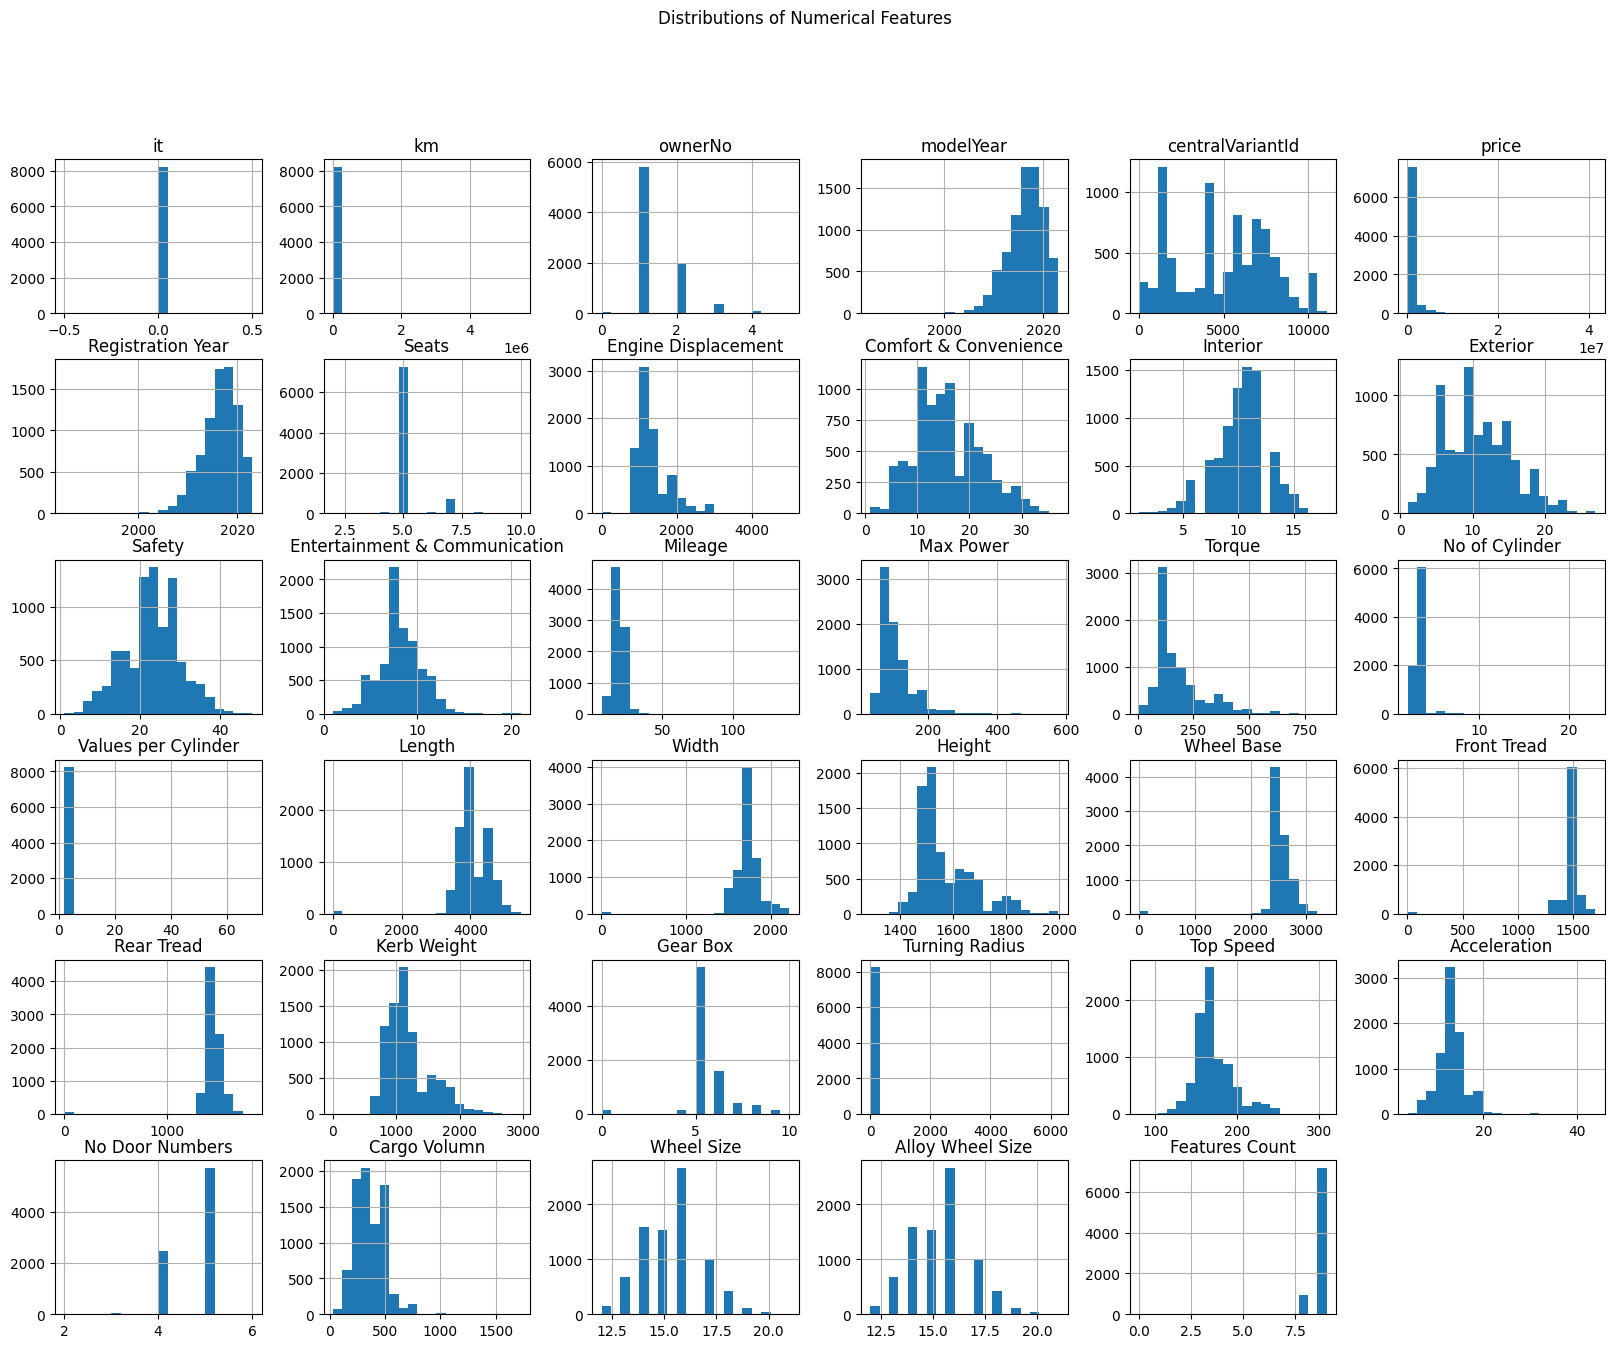

In [71]:
merged_cities.hist(bins=20, figsize=(20, 15))
plt.suptitle("Distributions of Numerical Features")
plt.show()

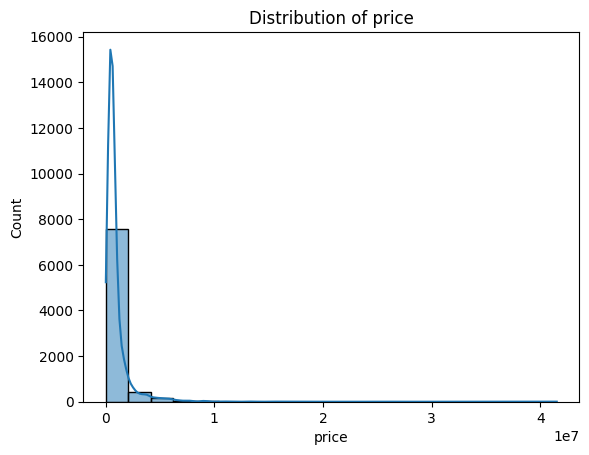

In [72]:
target_col = 'price'
sns.histplot(merged_cities[target_col], kde=True, bins=20)
plt.title(f"Distribution of {target_col}")
plt.show()

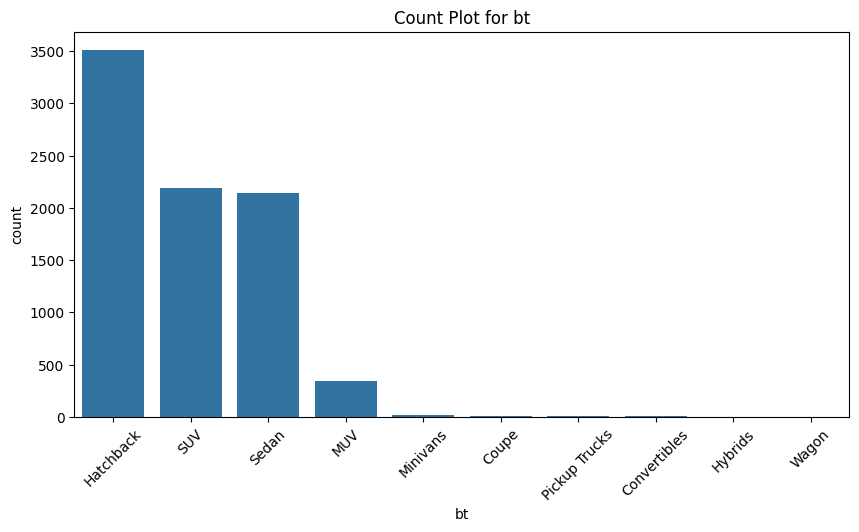

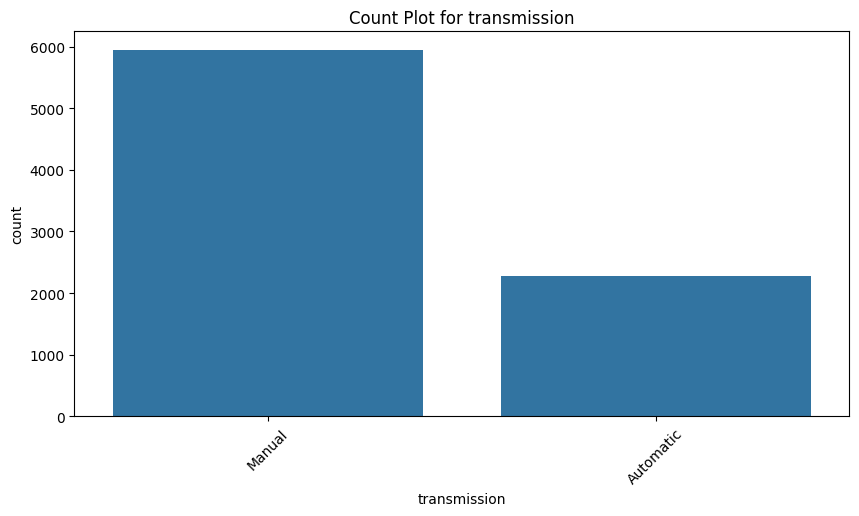

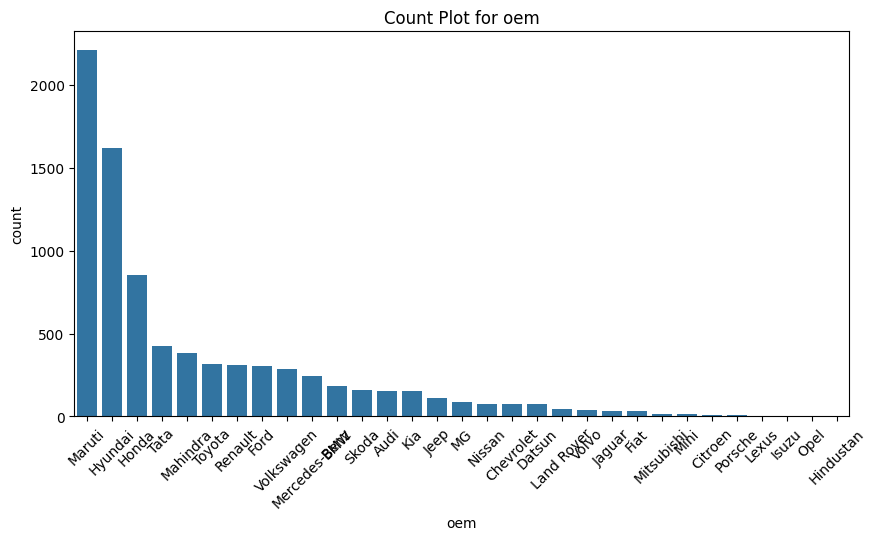

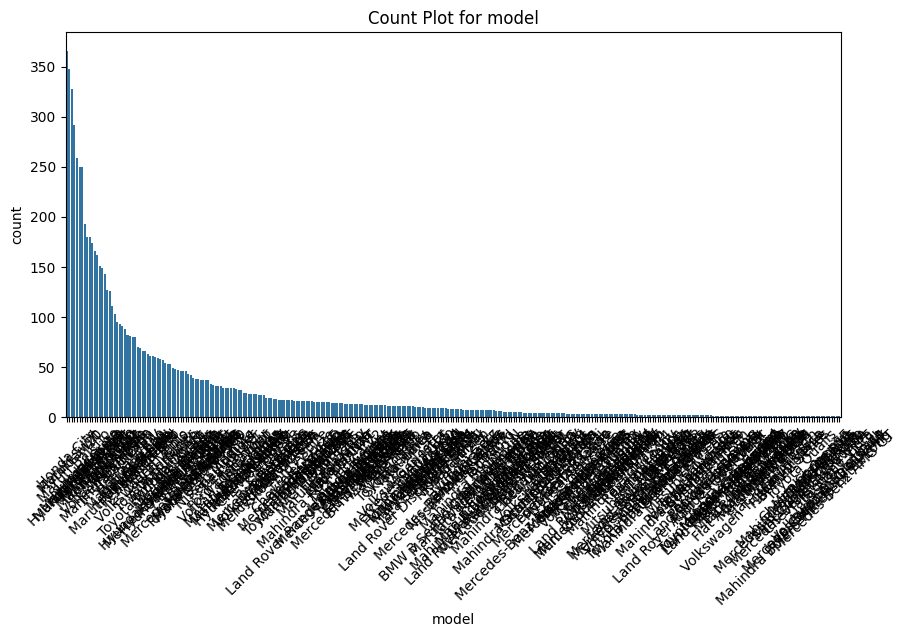

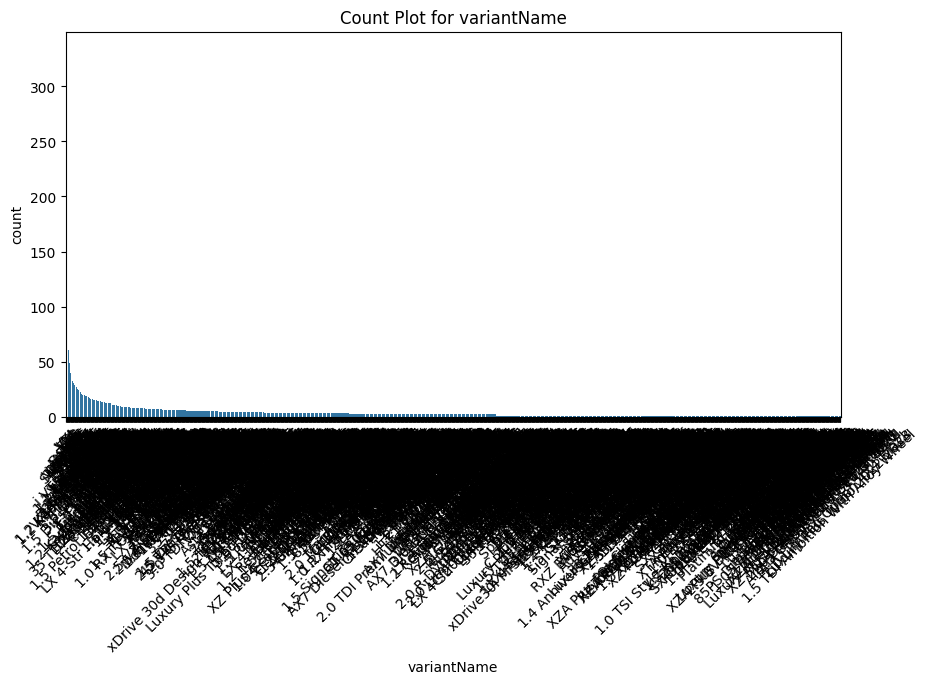

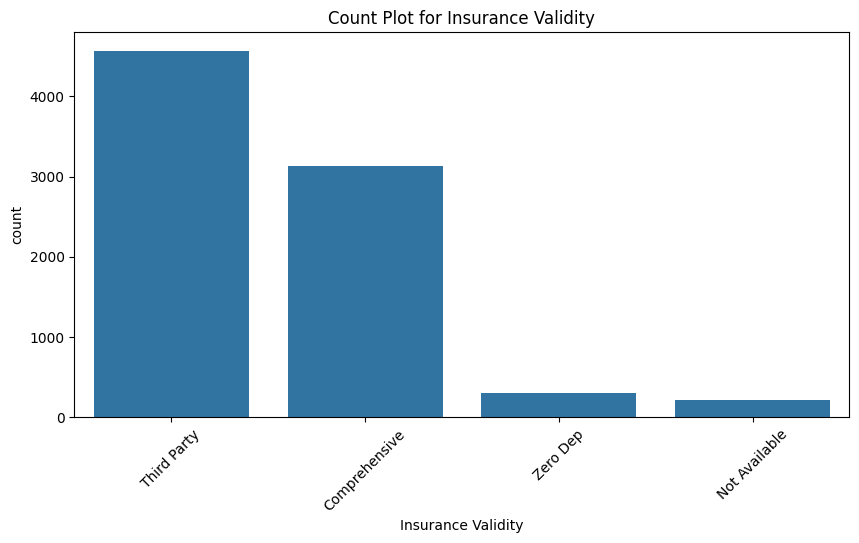

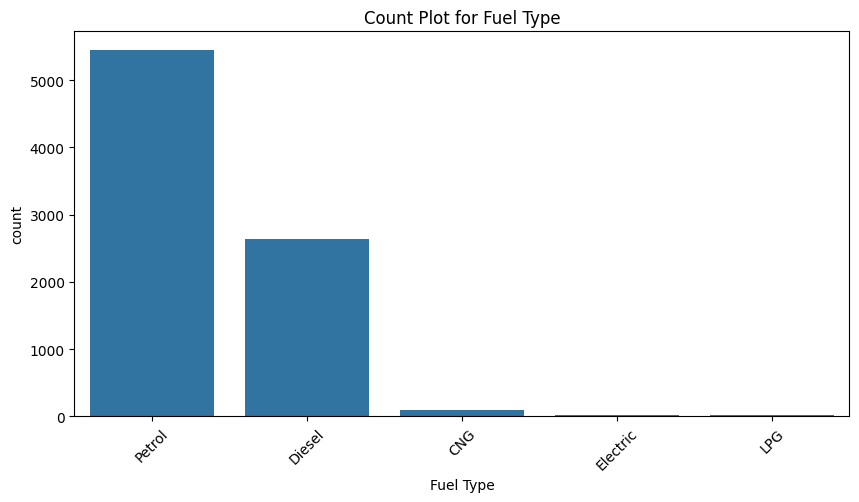

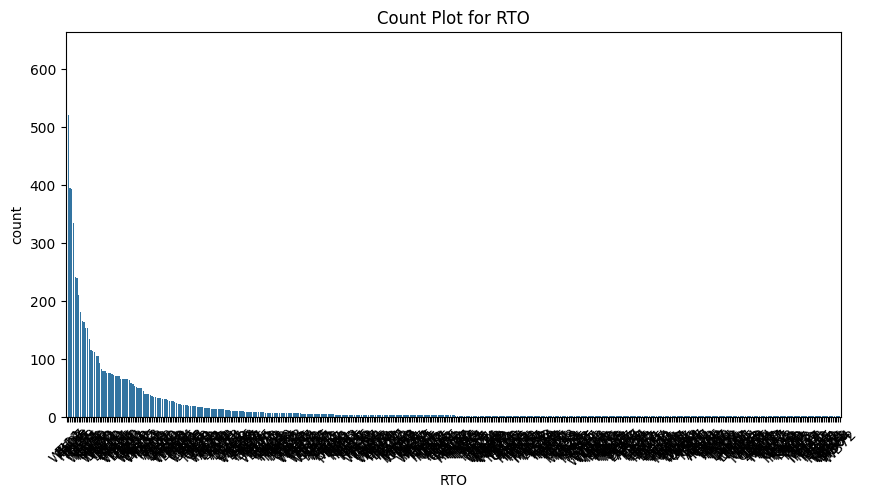

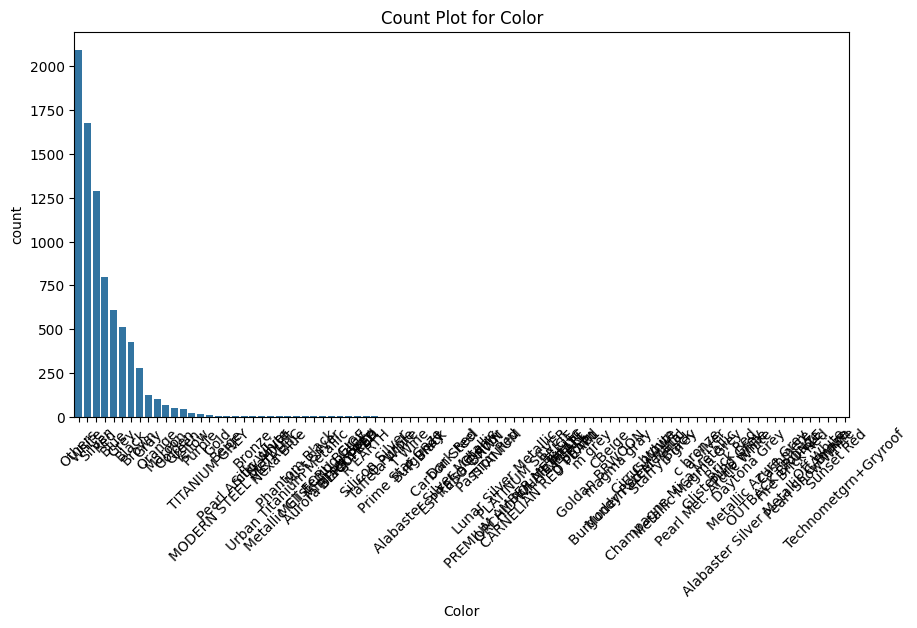

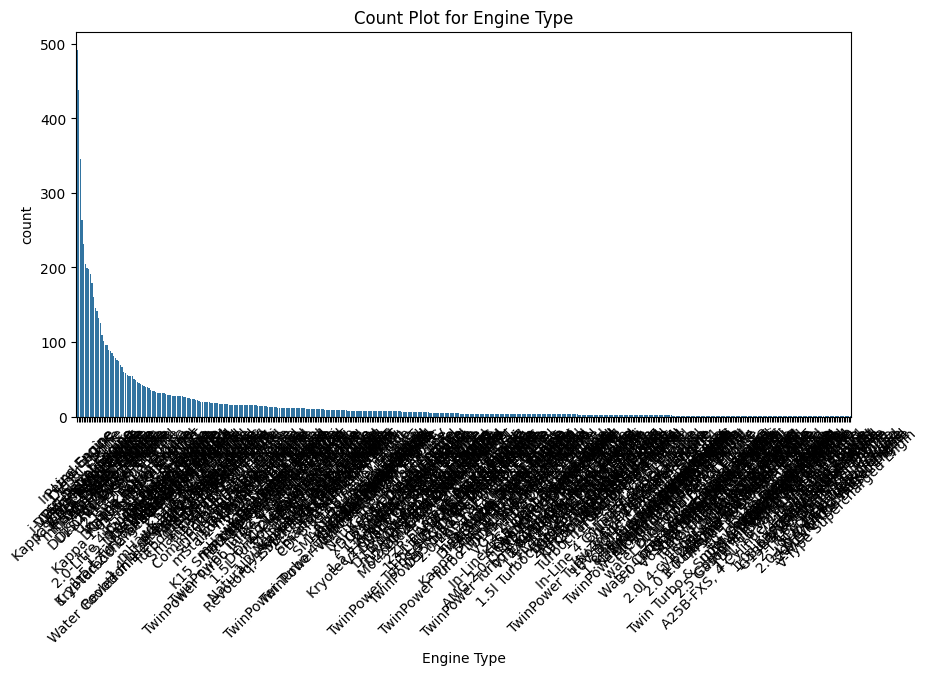

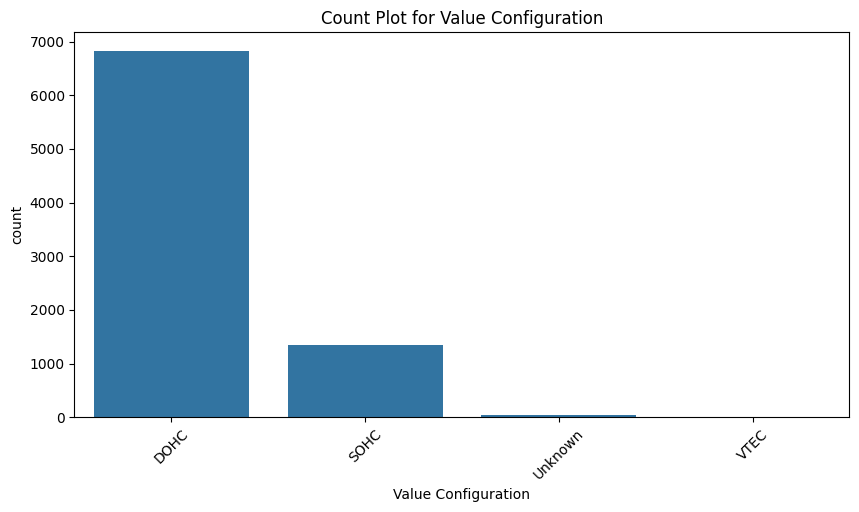

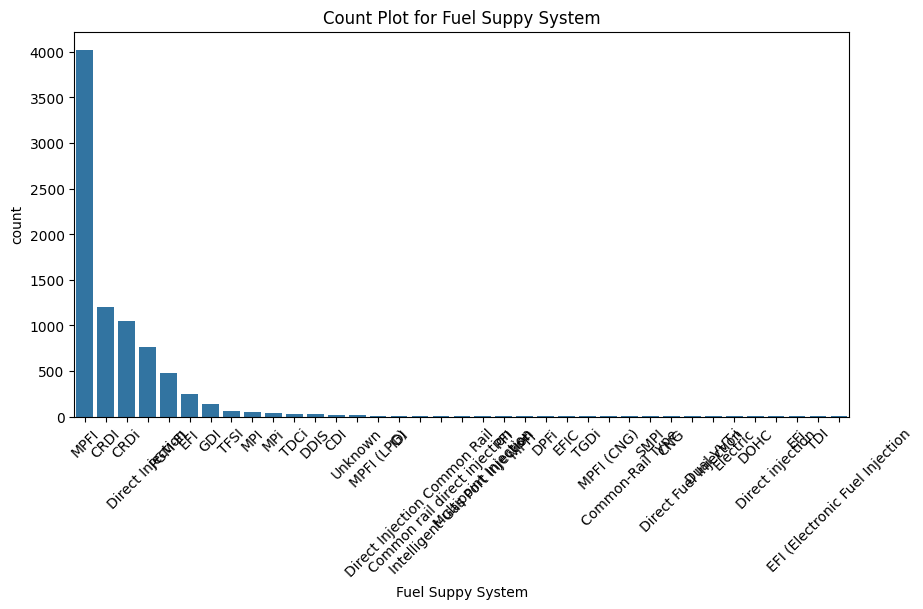

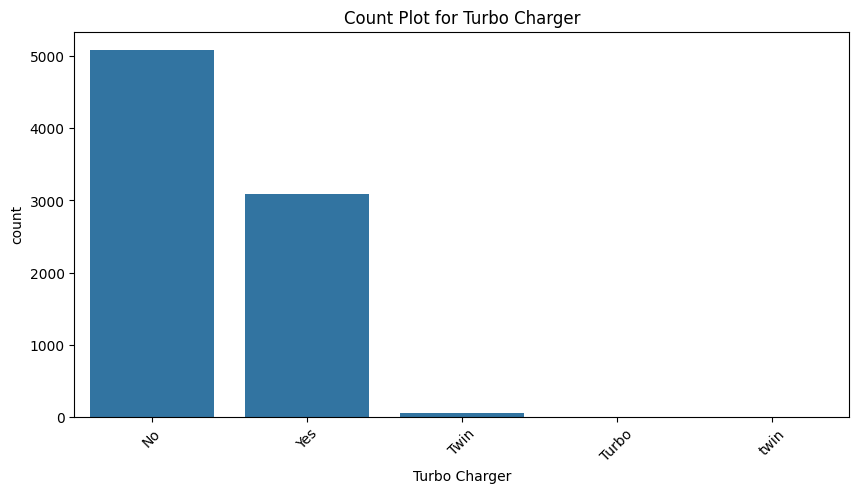

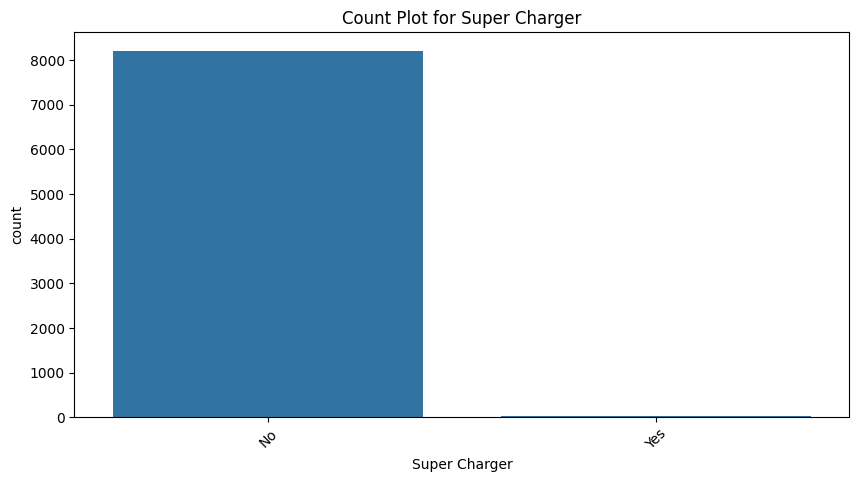

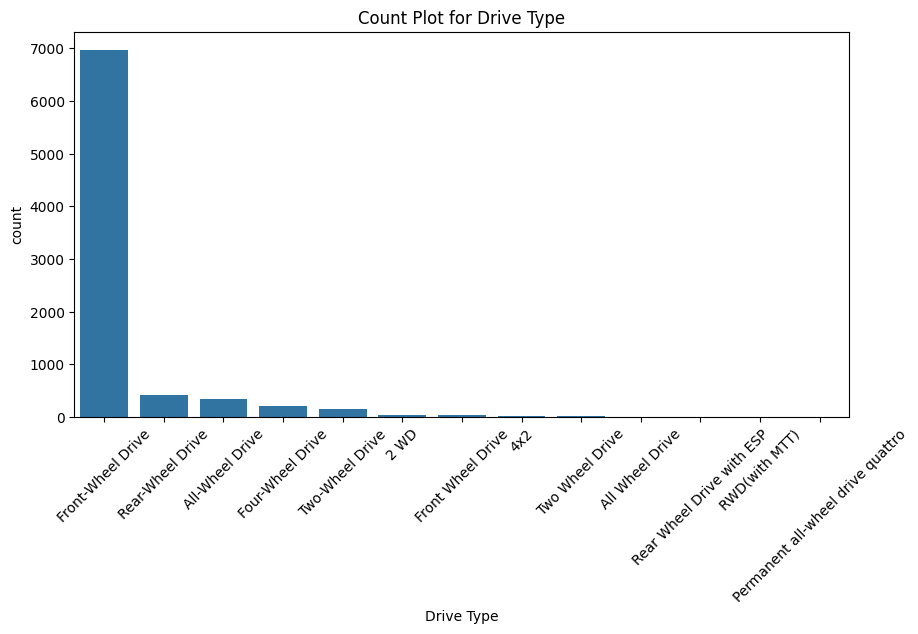

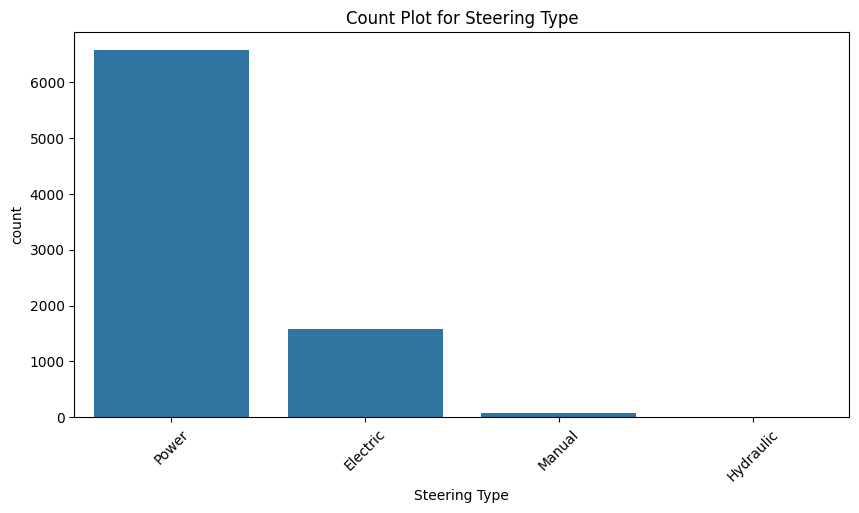

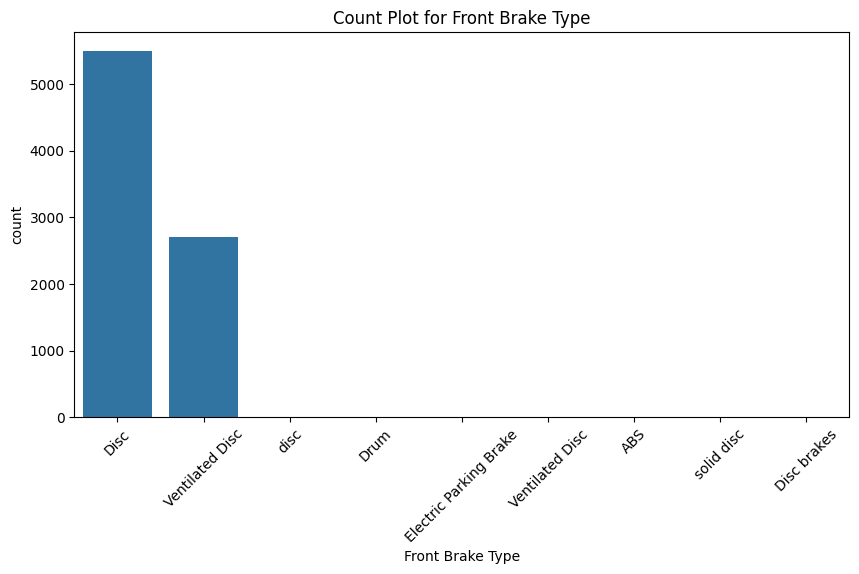

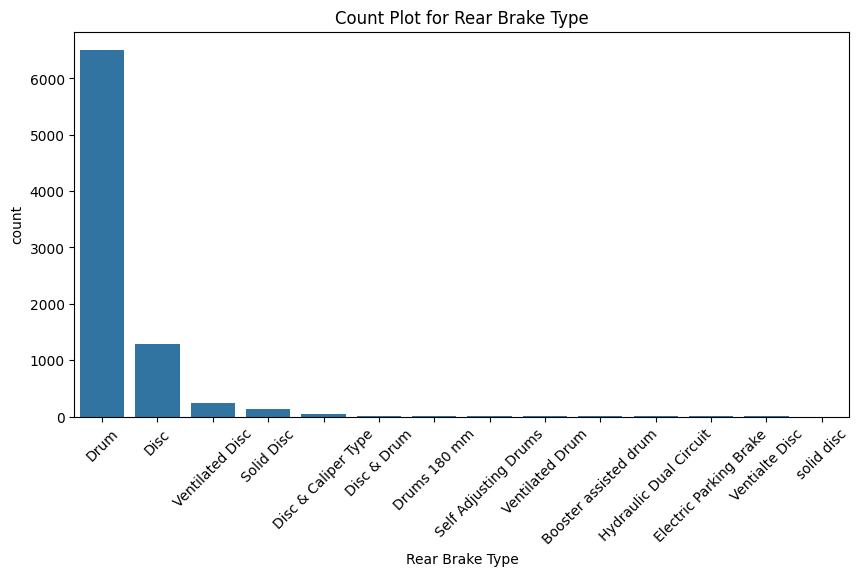

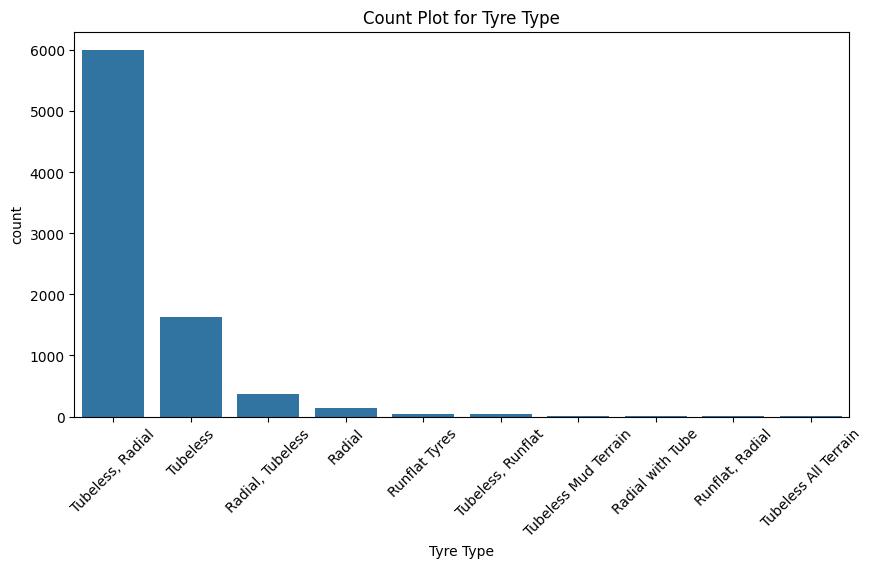

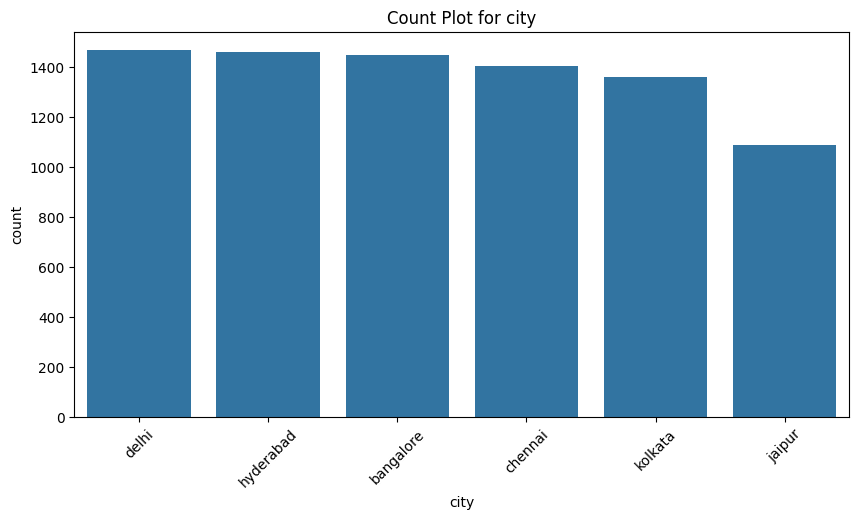

In [73]:
categorical_cols = merged_cities.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=merged_cities, x=col, order=merged_cities[col].value_counts().index)
    plt.title(f"Count Plot for {col}")
    plt.xticks(rotation=45)
    plt.show()

##### Step 8 --> Detect outliers

In [74]:
numerical_cols = merged_cities.select_dtypes(include=['float64', 'int64']).columns

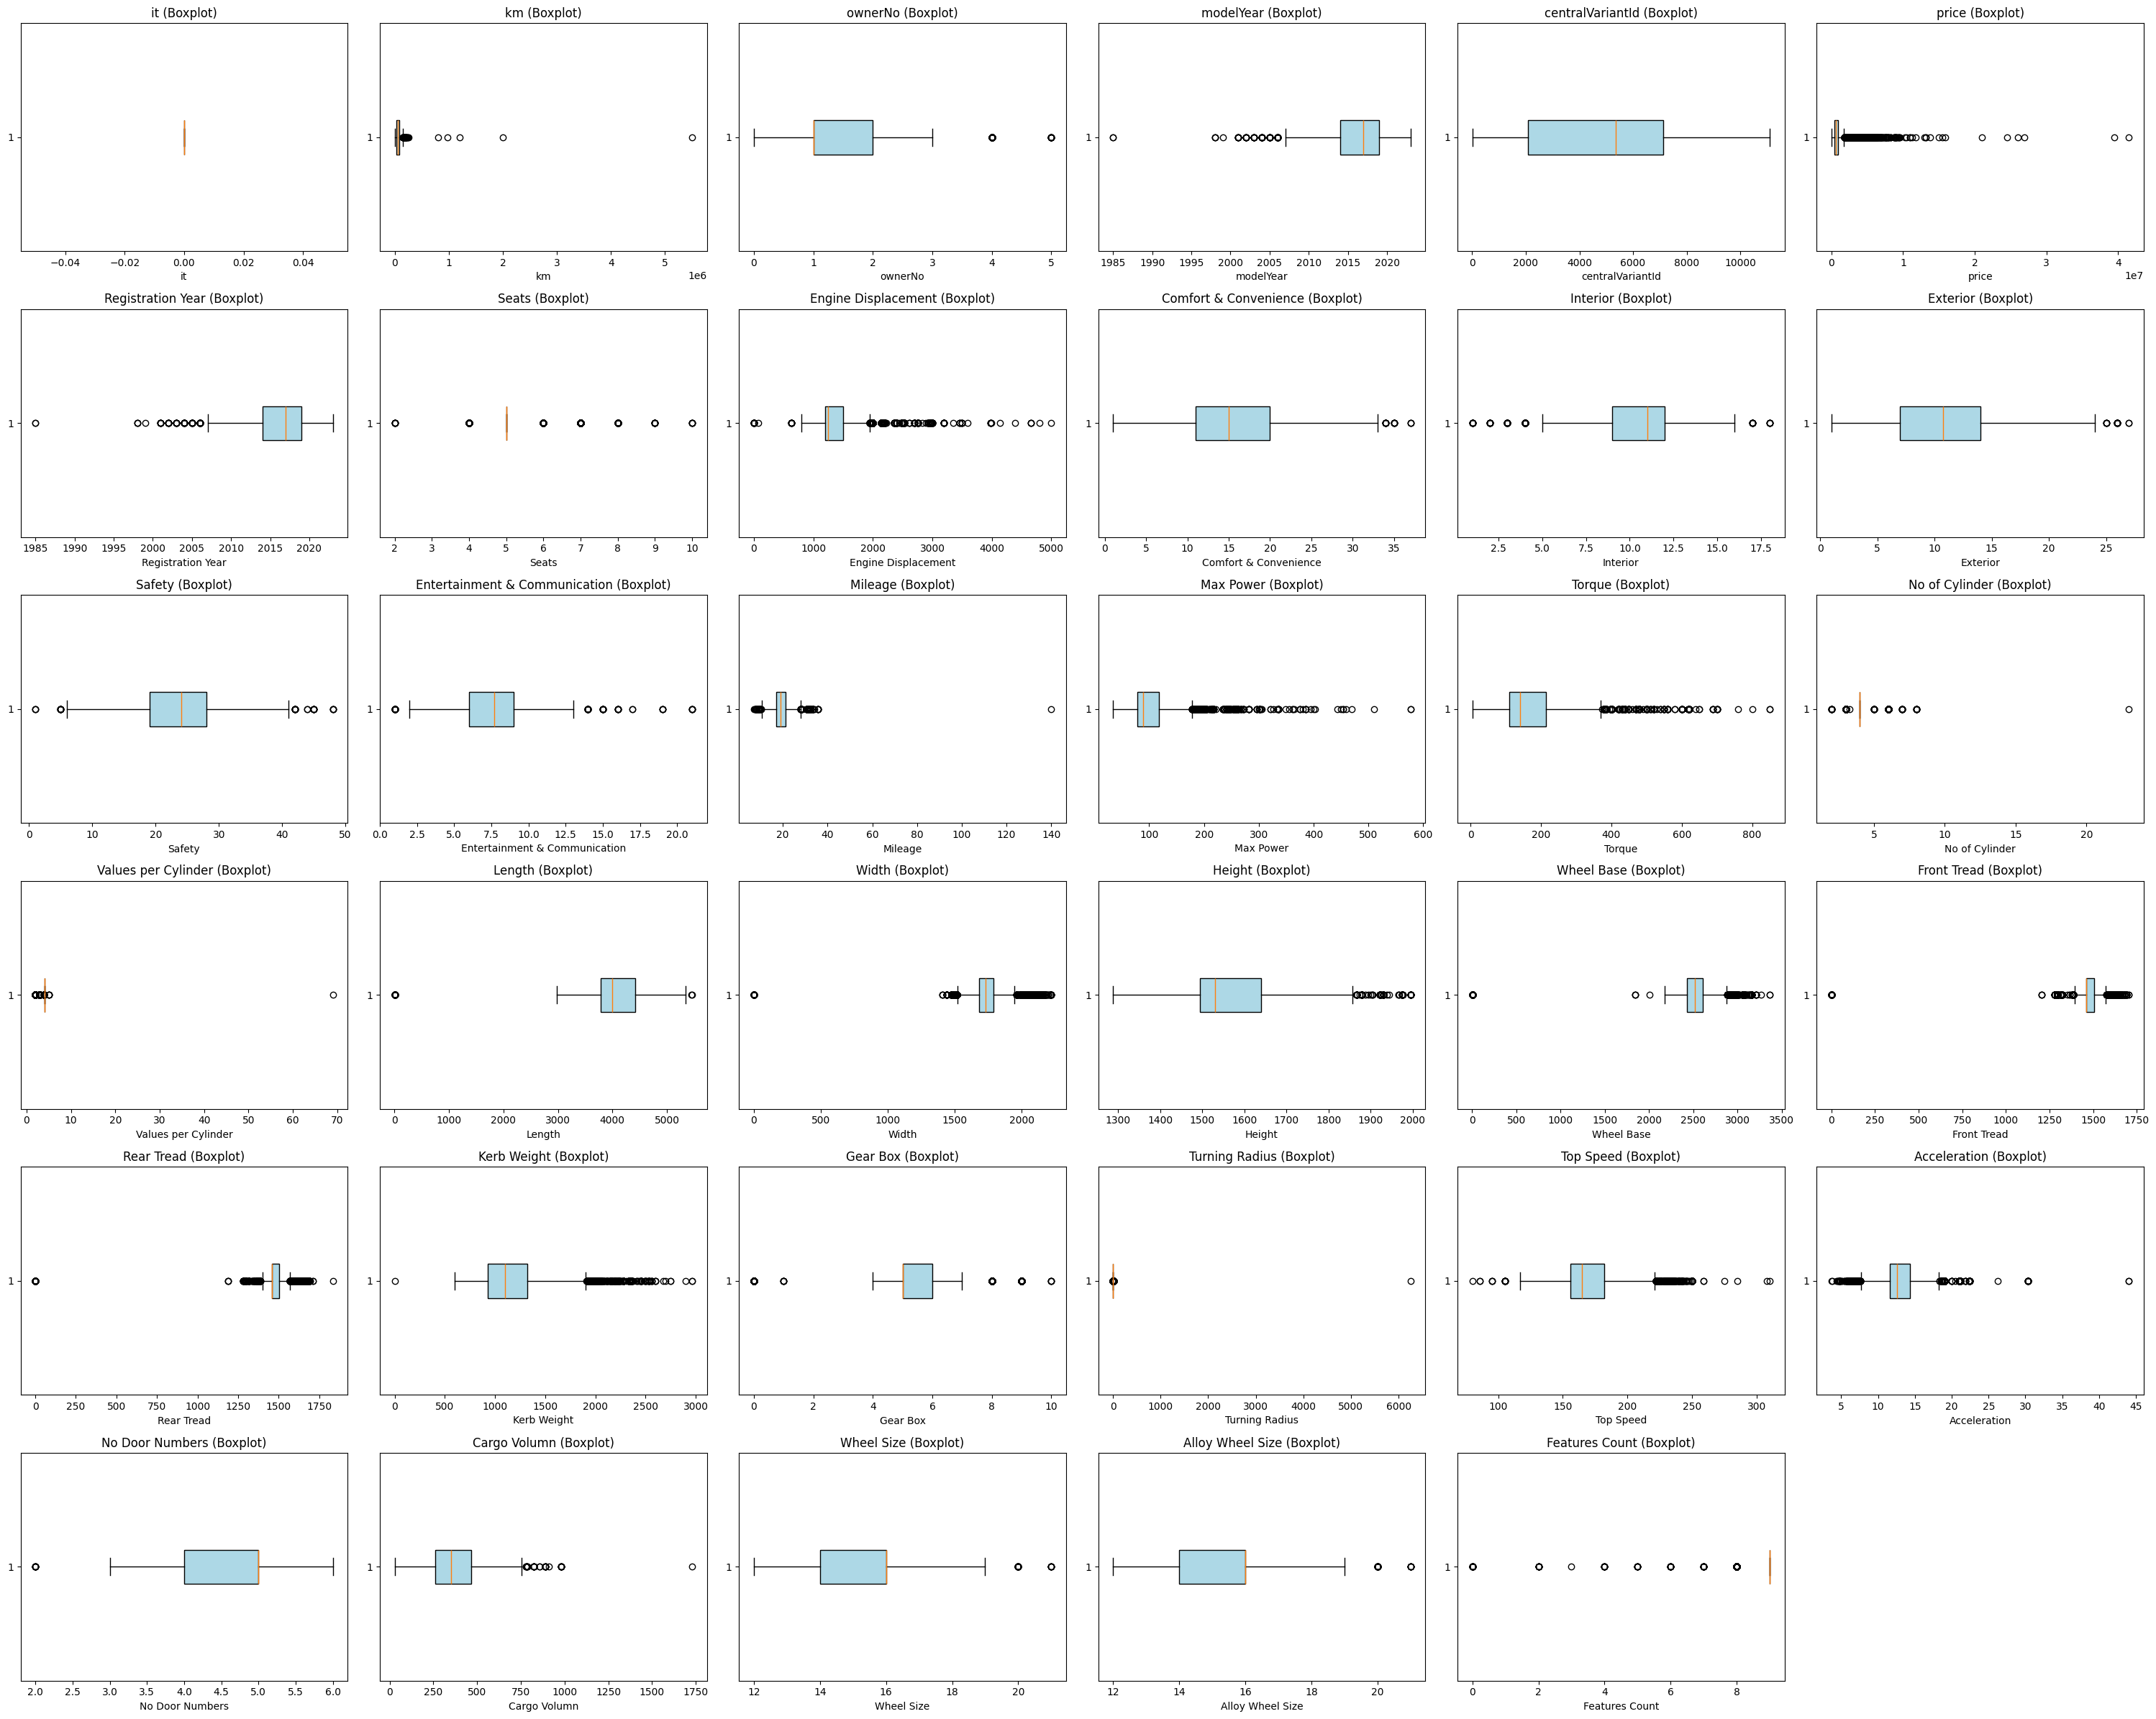

In [75]:
# Function to visualize outliers using boxplots for selected columns
def visualize_outliers_boxplot(df, columns, num_cols=6):
    num_rows = (len(columns) + num_cols - 1) // num_cols 
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 4))
    axes = axes.flatten()
   
    for i, col in enumerate(columns):
        ax = axes[i]
        ax.boxplot(df[col].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
        ax.set_title(f"{col} (Boxplot)")
        ax.set_xlabel(col)
   
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j]) 
    plt.tight_layout()
    plt.show()
 
visualize_outliers_boxplot(merged_cities, numerical_cols)

In [76]:
# detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

outlier_df = []
for col in numerical_cols:
    outliers = detect_outliers_iqr(merged_cities, col)
    
    if len(outliers) != 0:
        outlier_df.append({'col' : col, 'outliers_count' : len(outliers)})
        
pd.DataFrame(outlier_df)

,col,outliers_count
0,km,47
1,ownerNo,95
2,modelYear,110
3,price,870
4,Registration Year,109
5,Seats,984
6,Engine Displacement,1502
7,Comfort & Convenience,19
8,Interior,130
9,Exterior,24


In [77]:
# detect outliers using Z-score method
def detect_outliers_zscore(data, columns, threshold=3):
    outlier_stats = []
    outlier_col = []
    for col in columns:
        z_scores = zscore(data[col].dropna())
        outliers = np.sum(np.abs(z_scores) > threshold)
        
        if outliers > 0:
            outlier_col.append(col)
            outlier_stats.append({"Column": col,"Outliers": outliers})
    
    return pd.DataFrame(outlier_stats), outlier_col

outlier_zscore_stats, outlier_col_name = detect_outliers_zscore(merged_cities, numerical_cols)
outlier_zscore_stats


,Column,Outliers
0,km,5
1,ownerNo,95
2,modelYear,70
3,price,150
4,Registration Year,70
5,Seats,82
6,Engine Displacement,205
7,Comfort & Convenience,10
8,Interior,60
9,Exterior,24


In [78]:
# detect outliers using skew/kurtosis method
for column in numerical_cols:
    if merged_cities[column].skew() < 0.5 and merged_cities[column].skew() > -0.5 and merged_cities[column].kurtosis() < 3 and merged_cities[column].kurtosis() > -3:
        continue
    print(f'Skewness of the {column} : ',merged_cities[column].skew())
    print(f'Kurtosis of the {column} : ',merged_cities[column].kurtosis())
    print("-----------------------------------------")
 

Skewness of the km :  50.360438333213935
Kurtosis of the km :  3525.7711464742556
-----------------------------------------
Skewness of the ownerNo :  1.9045906208289625
Kurtosis of the ownerNo :  4.39166028500744
-----------------------------------------
Skewness of the modelYear :  -0.8468022078237312
Kurtosis of the modelYear :  1.5574648121120043
-----------------------------------------
Skewness of the price :  10.04130701779893
Kurtosis of the price :  198.29944849932832
-----------------------------------------
Skewness of the Registration Year :  -0.8605189049612392
Kurtosis of the Registration Year :  1.570972654952644
-----------------------------------------
Skewness of the Seats :  2.6008676179492953
Kurtosis of the Seats :  7.766673245988409
-----------------------------------------
Skewness of the Engine Displacement :  1.5997733554038218
Kurtosis of the Engine Displacement :  4.1424196152006445
-----------------------------------------
Skewness of the Mileage :  3.896423

In [ ]:
""" Conclusion for Step 8 -- Dectecting the outliers using visualisation, IQR, Z-score, skew/kurtosis , conclude that this dataset have outliers and need to handle this """

#### Step 9 -- Handle Outliers

In [79]:
def winsorize_outliers(df, columns, multiplier=1.5):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        df[col] = np.where(df[col] < lower_bound, lower_bound,
                           np.where(df[col] > upper_bound, upper_bound, df[col]))
    return df

winsorized_data = winsorize_outliers(merged_cities, numerical_cols, multiplier=1.5)


In [80]:
# remove this cell
outlier_zscore1, outlier_col1 = detect_outliers_zscore(winsorized_data, numerical_cols)
outlier_zscore1

,Column,Outliers
0,ownerNo,95
1,Length,63
2,No Door Numbers,54
3,Cargo Volumn,43


In [81]:
# def handle_specific_outliers(df):
#     column = 'No of Cylinder'
#     extreme_value = df[column].max()
#     if extreme_value > 20:
#         print(f"Handling outlier in '{column}' with value: {extreme_value}")
#         replacement_value = df[df[column] < extreme_value][column].max() 
#         df[column] = np.where(df[column] == extreme_value, replacement_value, df[column])
    
#     column = 'Values per Cylinder'
#     extreme_value = df[column].max()
#     if extreme_value > 60:
#         print(f"Handling outlier in '{column}' with value: {extreme_value}")
#         replacement_value = df[column].median()
#         df[column] = np.where(df[column] == extreme_value, replacement_value, df[column])
    
#     column = 'Turning Radius'
#     extreme_value = df[column].max()
#     if extreme_value > 6000:
#         print(f"Handling outlier in '{column}' with value: {extreme_value}")
#         replacement_value = extreme_value/1000  # Replace with the upper bound
#         df[column] = np.where(df[column] == extreme_value, replacement_value, df[column])

#     return df
# merged_cities = handle_specific_outliers(merged_cities)

In [82]:
print('dataset size handled the outliers:', merged_cities.shape)

dataset size handled the outliers: (8231, 55)


In [ ]:
""" conclusion for step 8 handling outliers --- handled Outliers using Winsorization method (Winsorization - Instead of removing outliers, cap them at the nearest threshold value.), 
Replace outliers with the closest valid value within the IQR range. """

In [83]:
# https://www.youtube.com/shorts/mNaPoJN3hQo

#### Step 9 - Find correlation , perform hypothesis test to find the columns which have relationship between 'price' column

In [84]:
num_cols = merged_cities.select_dtypes(include=['float64', 'int64']).columns
cat_cols = merged_cities.select_dtypes(include='object').columns

In [85]:
num_cols

Index(['it', 'km', 'ownerNo', 'modelYear', 'centralVariantId', 'price',
       'Registration Year', 'Seats', 'Engine Displacement',
       'Comfort & Convenience', 'Interior', 'Exterior', 'Safety',
       'Entertainment & Communication', 'Mileage', 'Max Power', 'Torque',
       'No of Cylinder', 'Values per Cylinder', 'Length', 'Width', 'Height',
       'Wheel Base', 'Front Tread', 'Rear Tread', 'Kerb Weight', 'Gear Box',
       'Turning Radius', 'Top Speed', 'Acceleration', 'No Door Numbers',
       'Cargo Volumn', 'Wheel Size', 'Alloy Wheel Size', 'Features Count'],
      dtype='object')

In [86]:
cat_cols

Index(['bt', 'transmission', 'oem', 'model', 'variantName',
       'Insurance Validity', 'Fuel Type', 'RTO', 'Color', 'Engine Type',
       'Value Configuration', 'Fuel Suppy System', 'Turbo Charger',
       'Super Charger', 'Drive Type', 'Steering Type', 'Front Brake Type',
       'Rear Brake Type', 'Tyre Type', 'city'],
      dtype='object')

In [87]:
duplicate_df = merged_cities.copy()

In [88]:
encoder = LabelEncoder()

for i in duplicate_df.select_dtypes(include="object").columns:
  duplicate_df[i] = encoder.fit_transform(duplicate_df[i]) 

In [89]:
# finding correlation with price column
correlation_matrix = duplicate_df.corr()
price_correlation = correlation_matrix['price'].sort_values(ascending=False)
price_correlation


price                            1.000000
Max Power                        0.815733
Wheel Size                       0.764458
Alloy Wheel Size                 0.764458
Kerb Weight                      0.762370
Torque                           0.758547
Width                            0.754113
Wheel Base                       0.742223
Comfort & Convenience            0.739356
Safety                           0.728423
Exterior                         0.716390
Turning Radius                   0.713674
Length                           0.699259
Gear Box                         0.681609
Interior                         0.657278
Engine Displacement              0.654760
Entertainment & Communication    0.567767
Turbo Charger                    0.531095
modelYear                        0.521985
Registration Year                0.520452
Top Speed                        0.495788
Front Tread                      0.487941
bt                               0.465795
Rear Tread                       0

In [ ]:
""" High Correlation - ( corr > 0.7 or corr > -0.7 ) 
Moderate Correlation - ( corr > 0.3 and corr < 0.7  or corr > -0.3 and corr < -0.7) 
Low Correlation - ( corr > 0.3 or corr > -0.3 ) """

In [90]:
merged_cities.columns

Index(['it', 'bt', 'km', 'transmission', 'ownerNo', 'oem', 'model',
       'modelYear', 'centralVariantId', 'variantName', 'price',
       'Registration Year', 'Insurance Validity', 'Fuel Type', 'Seats', 'RTO',
       'Engine Displacement', 'Comfort & Convenience', 'Interior', 'Exterior',
       'Safety', 'Entertainment & Communication', 'Mileage', 'Max Power',
       'Torque', 'Color', 'Engine Type', 'No of Cylinder',
       'Values per Cylinder', 'Value Configuration', 'Fuel Suppy System',
       'Turbo Charger', 'Super Charger', 'Length', 'Width', 'Height',
       'Wheel Base', 'Front Tread', 'Rear Tread', 'Kerb Weight', 'Gear Box',
       'Drive Type', 'Steering Type', 'Turning Radius', 'Front Brake Type',
       'Rear Brake Type', 'Top Speed', 'Acceleration', 'Tyre Type',
       'No Door Numbers', 'Cargo Volumn', 'Wheel Size', 'Alloy Wheel Size',
       'city', 'Features Count'],
      dtype='object')

In [91]:
domain_related_data = ['oem', 'ownerNo', 'transmission', 'km', 'modelYear', 'Fuel Type', 'Engine Displacement', 'Mileage', 'Max Power', 'model','Gear Box', 'bt', 'price']
corr_related_data = ['Max Power', 'Torque', 'Kerb Weight', 'Alloy Wheel Size', 'Wheel Size', 'Entertainment & Communication', 'Fuel Type', 'Fuel Suppy System', 'Mileage', 'transmission', 'Acceleration', 'price']
testing_data = ['Values per Cylinder', 'Seats', 'Super Charger', 'Tyre Type', 'Rear Brake Type', 'Front Brake Type', 'model', 'Steering Type', 'oem', 'variantName', 'No of Cylinder', 'Engine Type', 'price']

In [92]:
domain_cols = merged_cities[domain_related_data]
corr_cols = merged_cities[corr_related_data]
testing_cols = merged_cities[testing_data]

In [93]:
cat = domain_cols.select_dtypes(include="object").columns

In [94]:
domain_cols.to_csv('domain_related_data.csv', index=False)
# corr_cols.to_csv('corr_related_data.csv', index=False)
# testing_cols.to_csv('testing_related_data.csv', index=False)

In [95]:
# use hypothesis testing method to find relationship between columns

# defining function for continous vs continous
# def continous_vs_continous(d1,d2): # D1 = data 1, D2 = data 2
#   T=0 # True
#   F=0 # False
#   for i in range(31):
#     sample1 = d1.sample(frac=0.03)
#     sample2 = d2.sample(frac=0.03)
#     t_test,p_value = stats.ttest_ind(sample1,sample2)
#     if p_value < 0.07:
#       F = F+1
#     else:
#       T = T+1
#   if F > T:
#     return False
#   else:
#     return True



# defining function for category vs category
# def category_vs_category(d1,d2):
#   return True if stats.chi2_contingency(pd.crosstab(d1,d2))[1] < 0.07 else False


# defining function for continous(d1) vs category(d2)
# def continous_vs_category(d1,d2):
#   group = merged_cities[d2].unique()
#   data = {}
#   for i in group:
#     data[i] = merged_cities[merged_cities[d2] == i][d1]
#   f_value,p_value = stats.f_oneway(*[i for i in data.values()])
#   return True if p_value > 0.07 else False


# final = {}
# for i in merged_cities.columns:
#   final[i] = {}
#   for j in merged_cities.columns:
#     if (i in num_cols) and (j in num_cols):
#       result = continous_vs_continous(merged_cities[i],merged_cities[j])
#     elif (i in num_cols) and (j in cat_cols):
#       result = continous_vs_category(i,j)
#     elif (i in cat_cols) and (j in cat_cols):
#       result = category_vs_category(merged_cities[i],merged_cities[j])
#     elif (i in cat_cols) and (j in num_cols):
#       result = continous_vs_category(j,i)
#     if result:
#       final[i][j] = 1
#     else:
#       final[i][j] = 0


# pprint.pprint(final)
# final_df = pd.DataFrame(final)
# sns.heatmap(final_df,annot=True,cmap="coolwarm")

In [ ]:
""" conclusion for step 9 -- based on the correlation and domain knowledge , selected some columns to deploy model """